# ***Bibliotecas***

In [3]:
%matplotlib inline
import numpy  as np
import pandas as pd
import string
import warnings
import matplotlib.dates as mdates
import datetime
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
import pandas_datareader.data as web
import statsmodels.api as sm
import math
import seaborn as sns

from pandas.plotting import scatter_matrix
from datetime import date
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import StrMethodFormatter
from sklearn.pipeline import make_pipeline
from pandas_datareader import data
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from pandas.util.testing import assert_frame_equal
from scipy import stats
from matplotlib import style

# Opções de Gráfico

plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='Times New Roman', size=15)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True
kw_save = dict(bbox_iches='tight', transparent=True)

# <u>***Análise por Setor***</u>

In [8]:
varejo      = ['BTOW3.SA', 'LAME3.SA', 'MGLU3.SA', 'VVAR3.SA', '^BVSP', 'AMAR3.SA', 'ARZZ3.SA',  'CEAB3.SA', 'CNTO3.SA' , 'LLIS3.SA', 'LREN3.SA']

construtora = ['MRVE3.SA', 'TRIS3.SA', 'DIRR3.SA', 'EZTC3.SA', 'TEND3.SA', 'CYRE3.SA', 'HBOR3.SA', 'JHSF3.SA', 'EVEN3.SA', 'JFEN3.SA']

financeiro  = ['BPAC11.SA', 'BPAN4.SA', 'ITSA4.SA', 'BBAS3.SA', 'BBDC4.SA', 'ITUB4.SA', 'BMGB4.SA', 'SANB11.SA', 'BIDI4.SA']

saude       = ['FLRY3.SA', 'GNDI3.SA', 'HAPV3.SA', 'QUAL3.SA', 'RADL3.SA', 'ADHM3.SA', 'HYPE3.SA', 'PARD3.SA', 'ODPV3.SA', 'PNVL4.SA', 'AALR3.SA']

alimentos   = ['BEEF3.SA', 'CAML3.SA', 'BRFS3.SA', 'JBSS3.SA', 'MDIA3.SA', 'MRFG3.SA', 'SMTO3.SA', 'BSEV3.SA', 'SLCE3.SA', 'ABEV3.SA']

energia     = ['EGIE3.SA', 'ENEV3.SA', 'EQTL3.SA', 'OMGE3.SA', 'TIET11.SA', 'ALUP11.SA', 'CEBR3.SA', 'CMIG3.SA', 'CESP6.SA', 'CPFE3.SA', 'ELET3.SA', 'LIGT3.SA', 'NEOE3.SA', 'TAEE11.SA']

tecnologia  = ['LINX3.SA', 'SQIA3.SA', 'TOTS3.SA', 'POSI3.SA']

materiais   = ['BRKM3.SA', 'CSNA3.SA', 'DTEX3.SA', 'FESA3.SA', 'GGBR4.SA', 'SUZB3.SA', 'UNIP6.SA', 'USIM3.SA', 'VALE3.SA', 'PETR3.SA', 'PRIO3.SA', 'UGPA3.SA', 'ENAT3.SA', 'DMMO3.SA', 'CSAN3.SA']

diversos    = ['WEGE3.SA', 'B3SA3.SA', 'MGLU3.SA', 'BPAC11.SA', 'JHSF3.SA', 'ENEV3.SA', 'LWSA3.SA']

tickers     = ['BTOW3.SA', 'LAME3.SA', 'LREN3.SA', 'MGLU3.SA', 'VVAR3.SA', 'TRIS3.SA', 'BPAC11.SA', 'BPAN4.SA', 'GNDI3.SA', 'CAML3.SA', 'EGIE3.SA', 'TIET11.SA', 'ENEV3.SA', 'SQIA3.SA', 'WEGE3.SA', 'B3SA3.SA', 'JHSF3.SA', 'LWSA3.SA', 'VALE3.SA']

todos = ['BTOW3.SA', 'LAME3.SA', 'MGLU3.SA', 'VVAR3.SA', 'MRVE3.SA', 'CYRE3.SA', 'BPAC11.SA', 'BPAN4.SA', 'ITSA4.SA', 'BBAS3.SA', 'BBDC4.SA', 'GNDI3.SA', 'RADL3.SA',
         'CAML3.SA', 'JBSS3.SA', 'ABEV3.SA', 'EGIE3.SA', 'ELET3.SA', 'LWSA3.SA', 'TOTS3.SA',  'VALE3.SA', 'CSNA3.SA', 'WEGE3.SA', 'B3SA3.SA', '^BVSP']

# <u>***Varejo***</u>

In [9]:
listOfReturns  = []
listOfRisks    = []
listOfVaRs     = []
varejo_returns = pd.Series(dtype='float64')
varejo_risk    = pd.Series(dtype='float64')
varejo_VaR      = pd.Series(dtype='float64')

for i in range(len(varejo)):
    data    = yf.download(varejo[i], start='2019-01-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {varejo[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {varejo[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)
    
    var_95            = norm.ppf(1-0.95, np.mean(returns), np.std(returns))
    dictionary_var    = {varejo[i] : var_95}
    series_var        = pd.Series(dictionary_var)
    listOfVaRs.append(series_var)
    
varejo_returns = varejo_returns.append(listOfReturns)
varejo_risk    = varejo_risk.append(listOfRisks)
varejo_VaR     = varejo_VaR.append(listOfVaRs)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

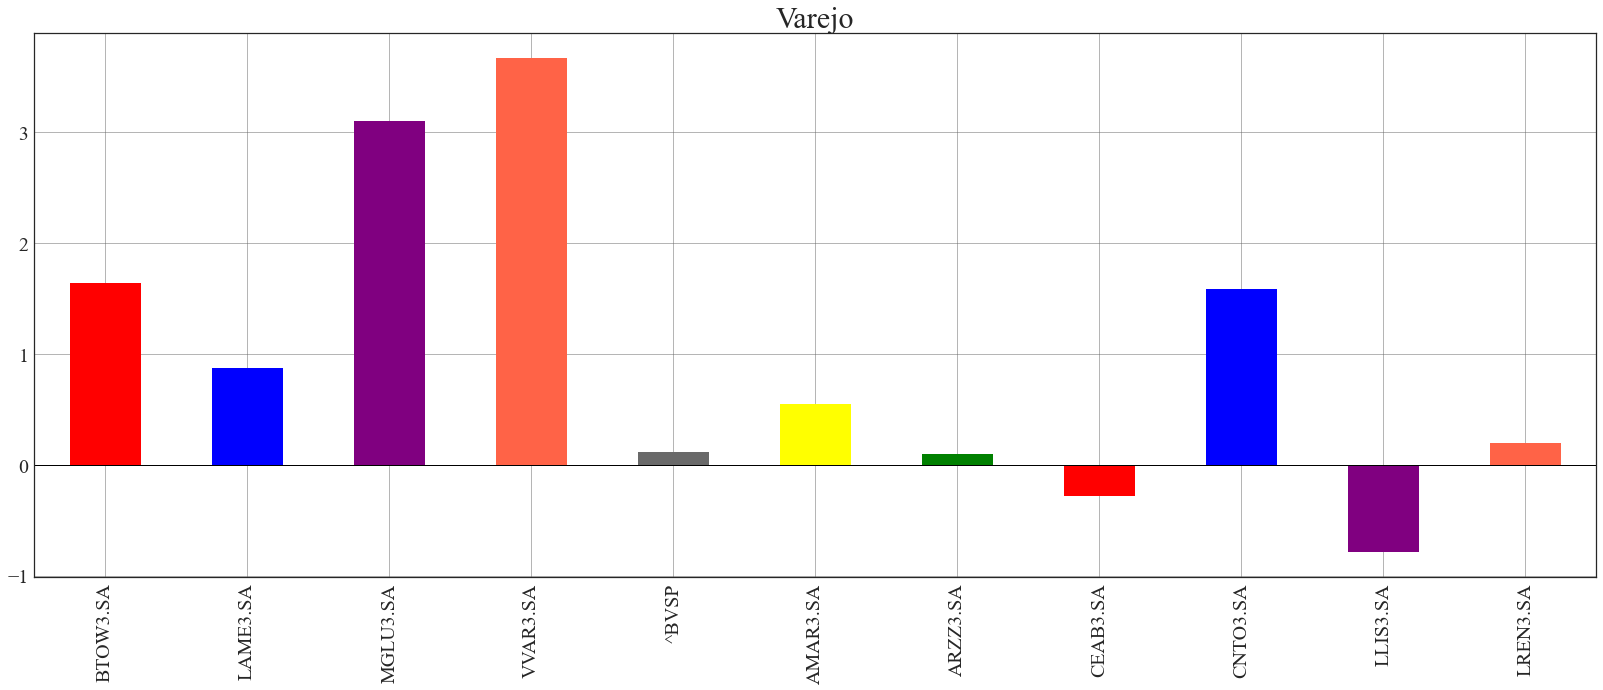

In [10]:
varejo_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Varejo', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

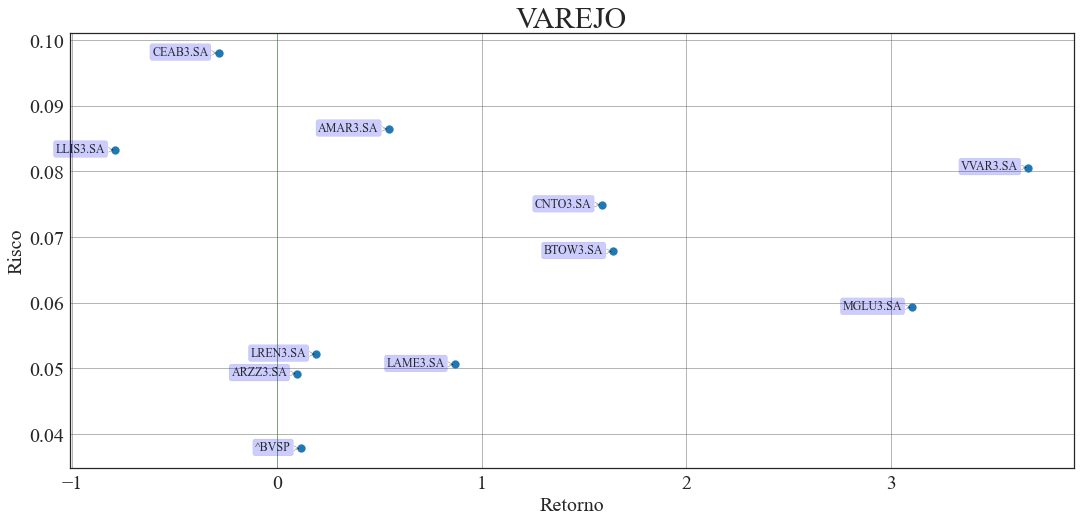

In [11]:
plt.subplots(figsize=(18,8))
plt.title('VAREJO', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(varejo_returns, varejo_VaR*(-1))
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='green', alpha = 0.3)

for label, x, y in zip(varejo_returns.index, varejo_returns, varejo_VaR*(-1)):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-10, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.2', fc = 'blue', alpha = 0.2),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

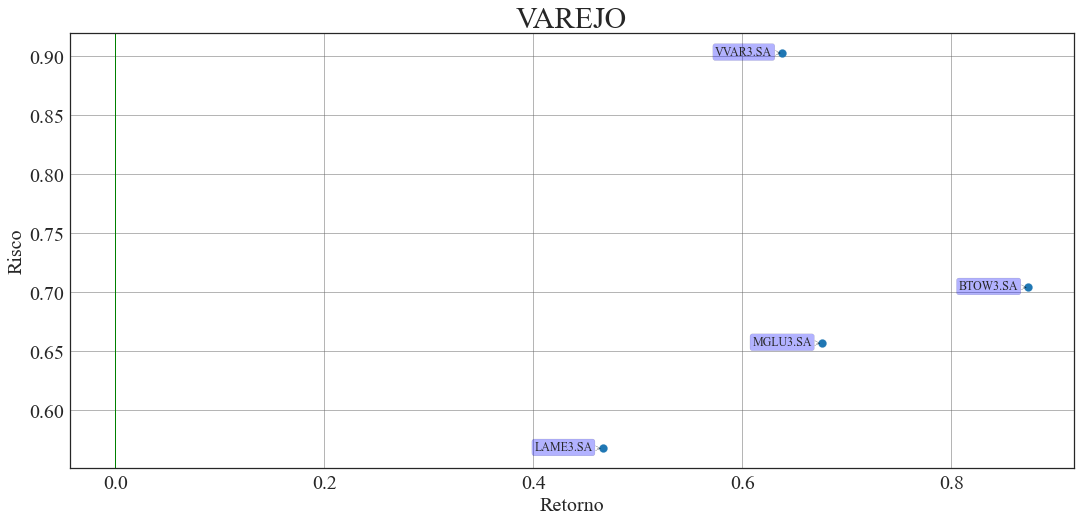

In [17]:
plt.subplots(figsize=(18,8))
plt.title('VAREJO', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(varejo_returns, varejo_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='green')

for label, x, y in zip(varejo_returns.index, varejo_returns, varejo_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-10, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.2', fc = 'blue', alpha = 0.3),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  9 of 9 completed


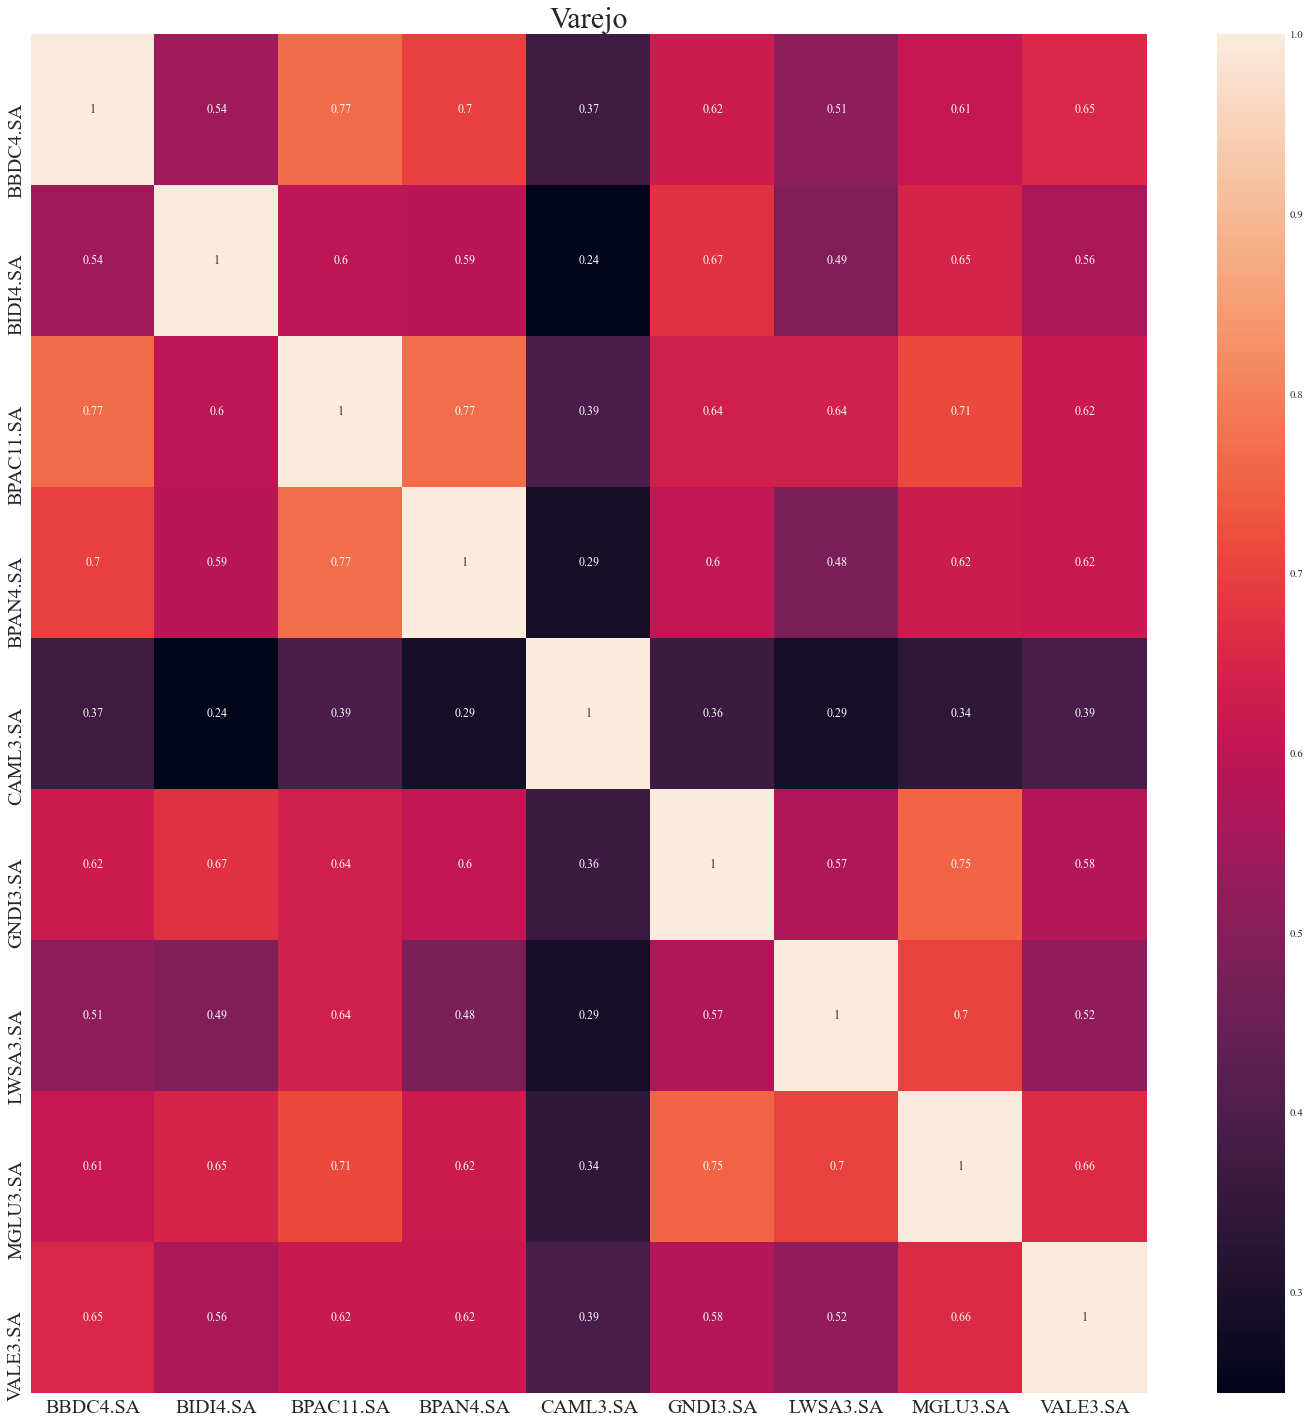

In [9]:
data    = yf.download('BPAC11.SA BBDC4.SA BIDI4.SA BPAN4.SA LWSA3.SA VALE3.SA MGLU3.SA GNDI3.SA CAML3.SA', start='2020-01-01')['Adj Close']
data.ffill(inplace=True)
    
varejo_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(25,25))
plt.title('Varejo', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(varejo_daily_returns.corr(), annot=True)

# <u>***Financeiro***</u>

In [10]:
listOfReturns  = []
listOfRisks    = []
financeiro_returns = pd.Series(dtype='float64')
financeiro_risk    = pd.Series(dtype='float64')

for i in range(len(financeiro)):
    data    = yf.download(financeiro[i], start='2019-01-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {financeiro[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {financeiro[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

financeiro_returns = financeiro_returns.append(listOfReturns)
financeiro_risk    = financeiro_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

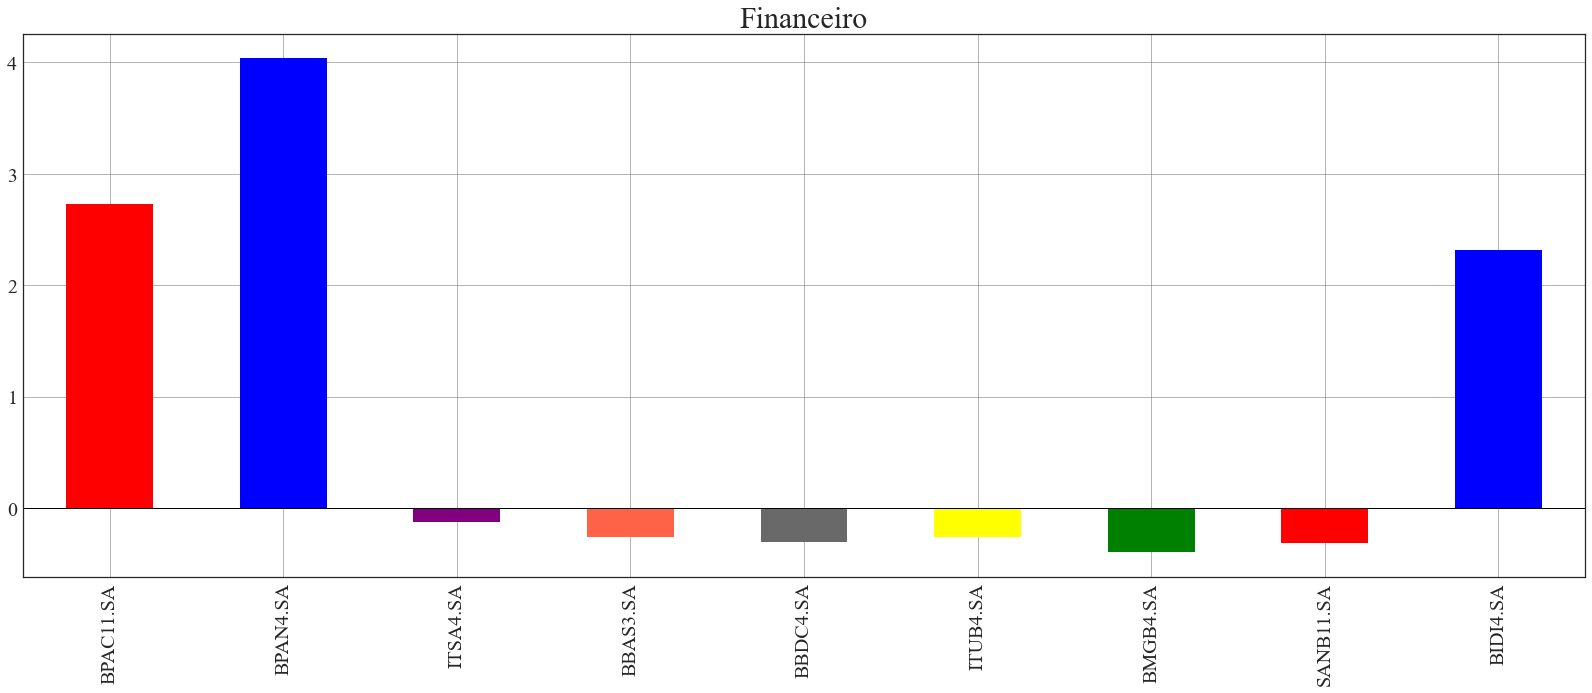

In [11]:
financeiro_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Financeiro', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

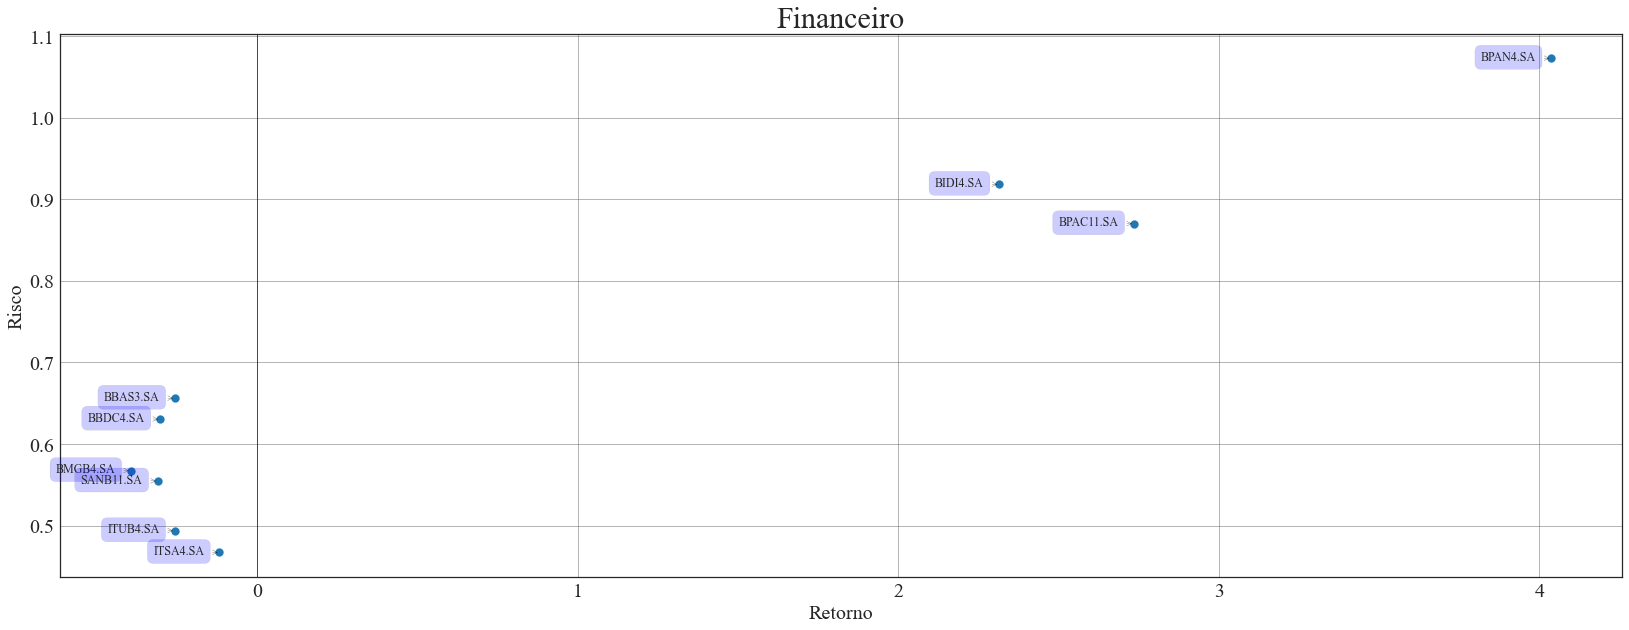

In [12]:
plt.subplots(figsize=(28,10))
plt.title('Financeiro', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(financeiro_returns, financeiro_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black', alpha = 0.6)

for label, x, y in zip(financeiro_returns.index, financeiro_returns, financeiro_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.2),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  10 of 10 completed


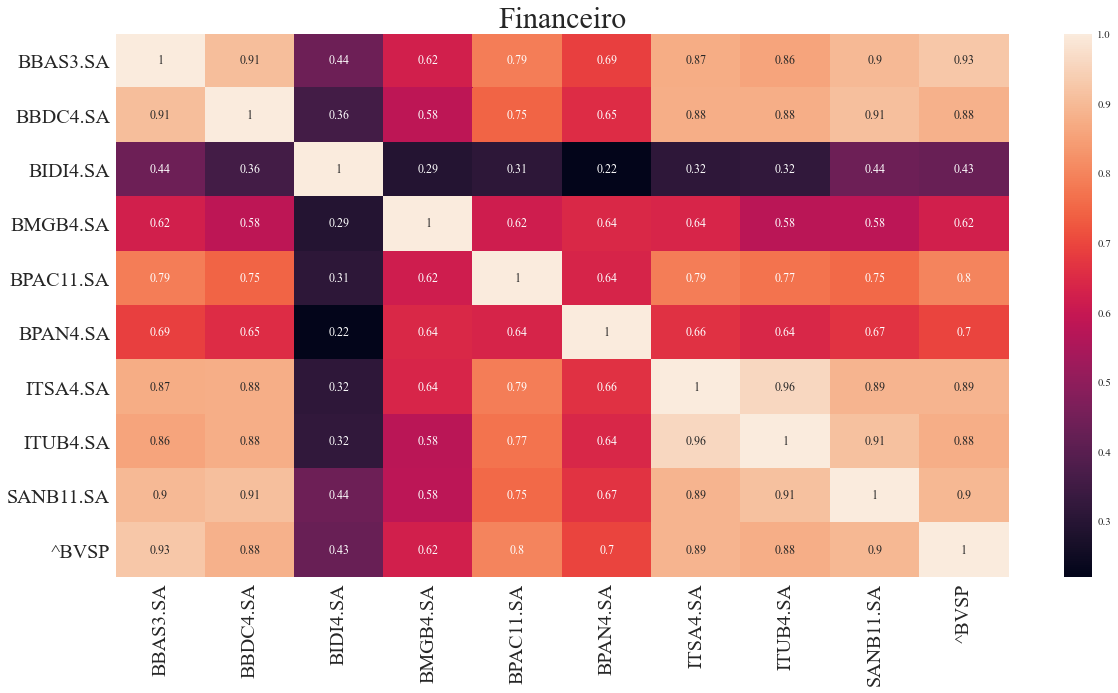

In [13]:
financeiro = financeiro+['^BVSP']
data    = yf.download(financeiro, start='2020-03-20', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
financeiro_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('Financeiro', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(financeiro_daily_returns.corr(), annot=True)

# <u>***Construtoras***</u>

In [14]:
listOfReturns  = []
listOfRisks    = []
construtoras_returns = pd.Series(dtype='float64')
construtoras_risk    = pd.Series(dtype='float64')

for i in range(len(construtora)):
    data    = yf.download(construtora[i], start='2019-12-27', end='2020-07-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {construtora[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {construtora[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

construtoras_returns = construtoras_returns.append(listOfReturns)
construtoras_risk    = construtoras_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

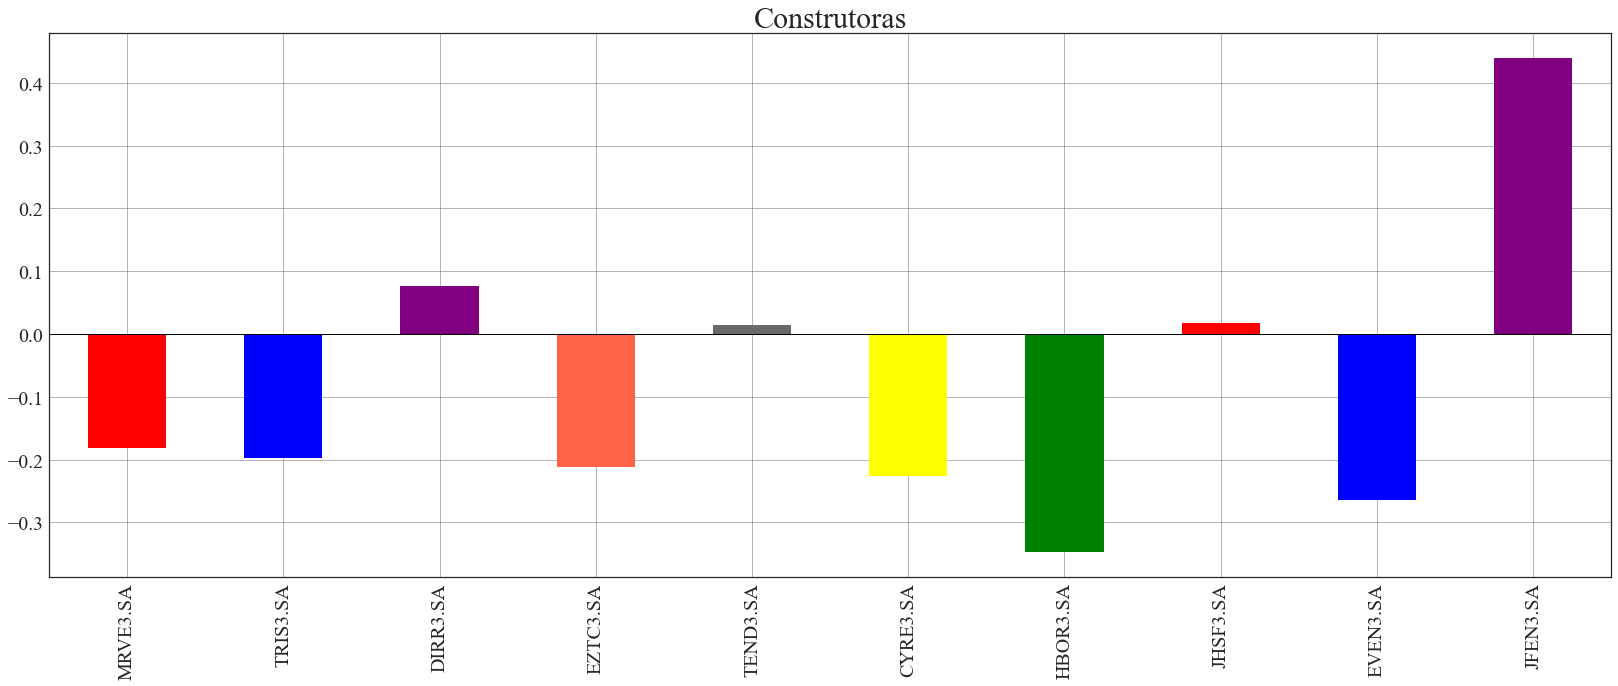

In [30]:
construtoras_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Construtoras', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

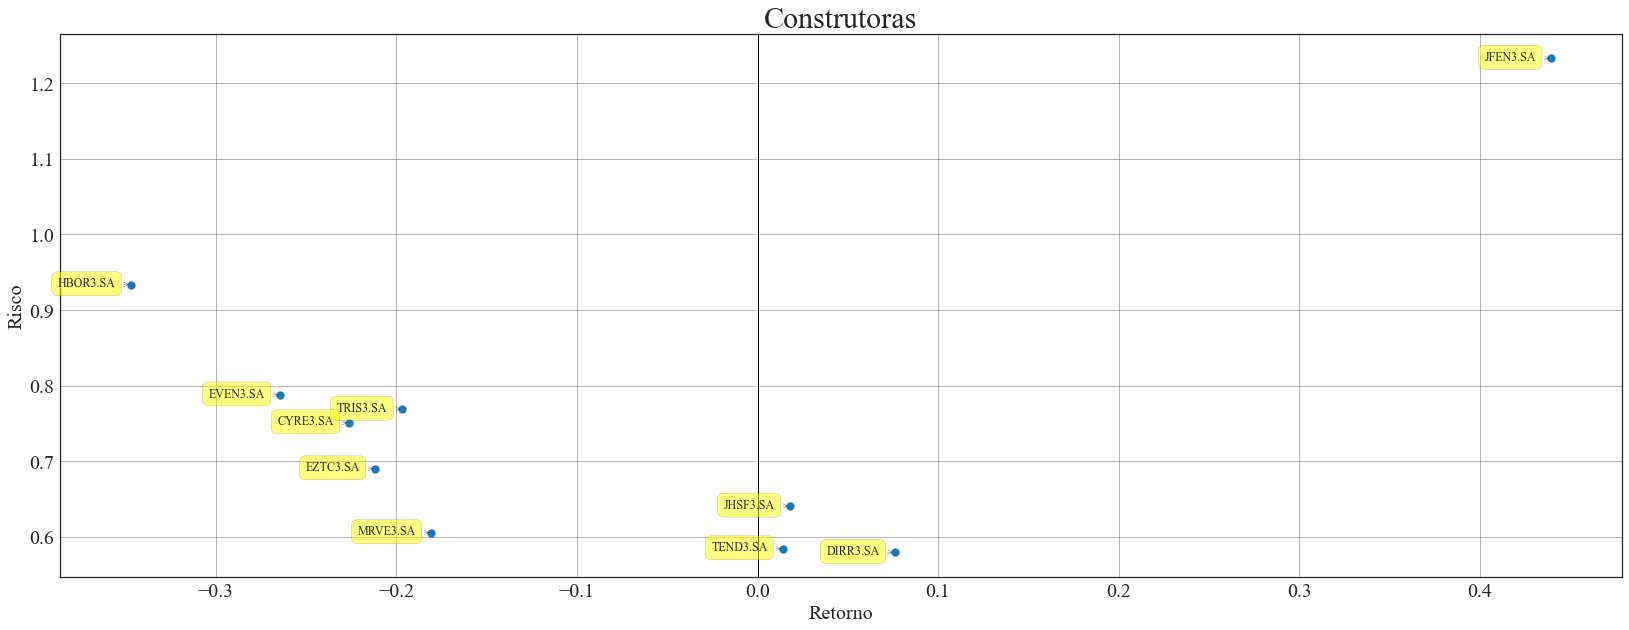

In [26]:
plt.subplots(figsize=(28,10))
plt.title('Construtoras', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(construtoras_returns, construtoras_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(construtoras_returns.index, construtoras_returns, construtoras_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  11 of 11 completed


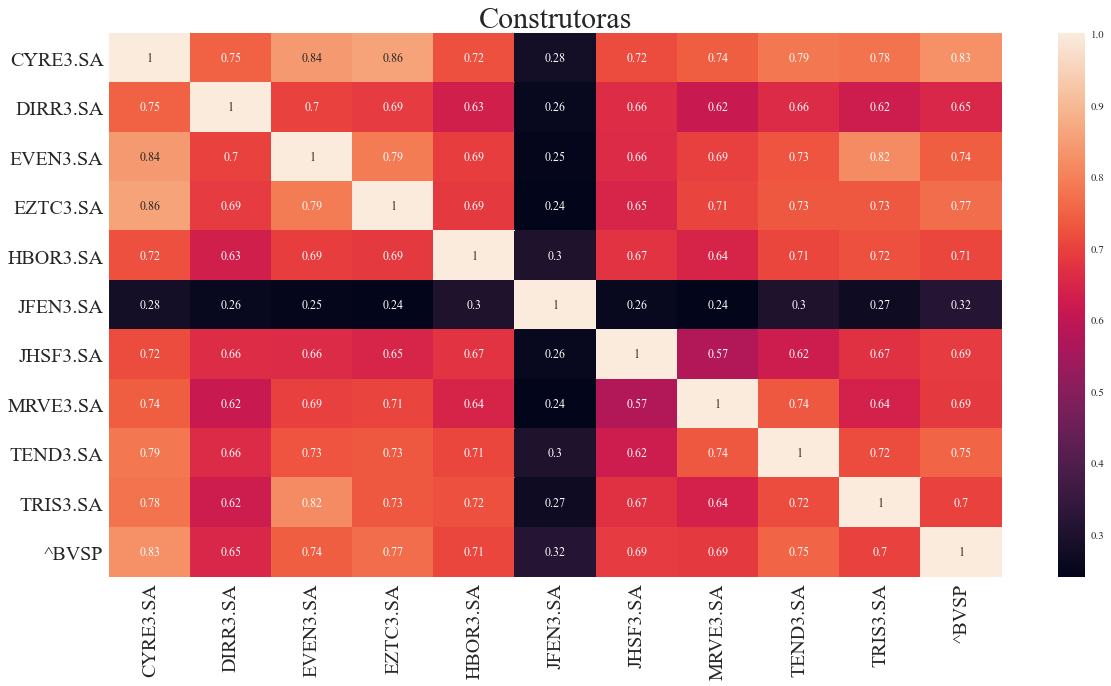

In [173]:
construtora = construtora+['^BVSP']
data    = yf.download(construtora, start='2018-12-27', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
construtora_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('Construtoras', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(construtora_daily_returns.corr(), annot=True)

# <u>***Saúde***</u>

In [34]:
listOfReturns  = []
listOfRisks    = []
saude_returns = pd.Series(dtype='float64')
saude_risk    = pd.Series(dtype='float64')

for i in range(len(saude)):
    data    = yf.download(saude[i], start='2019-12-27', end='2020-07-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {saude[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {saude[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

saude_returns = saude_returns.append(listOfReturns)
saude_risk    = saude_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

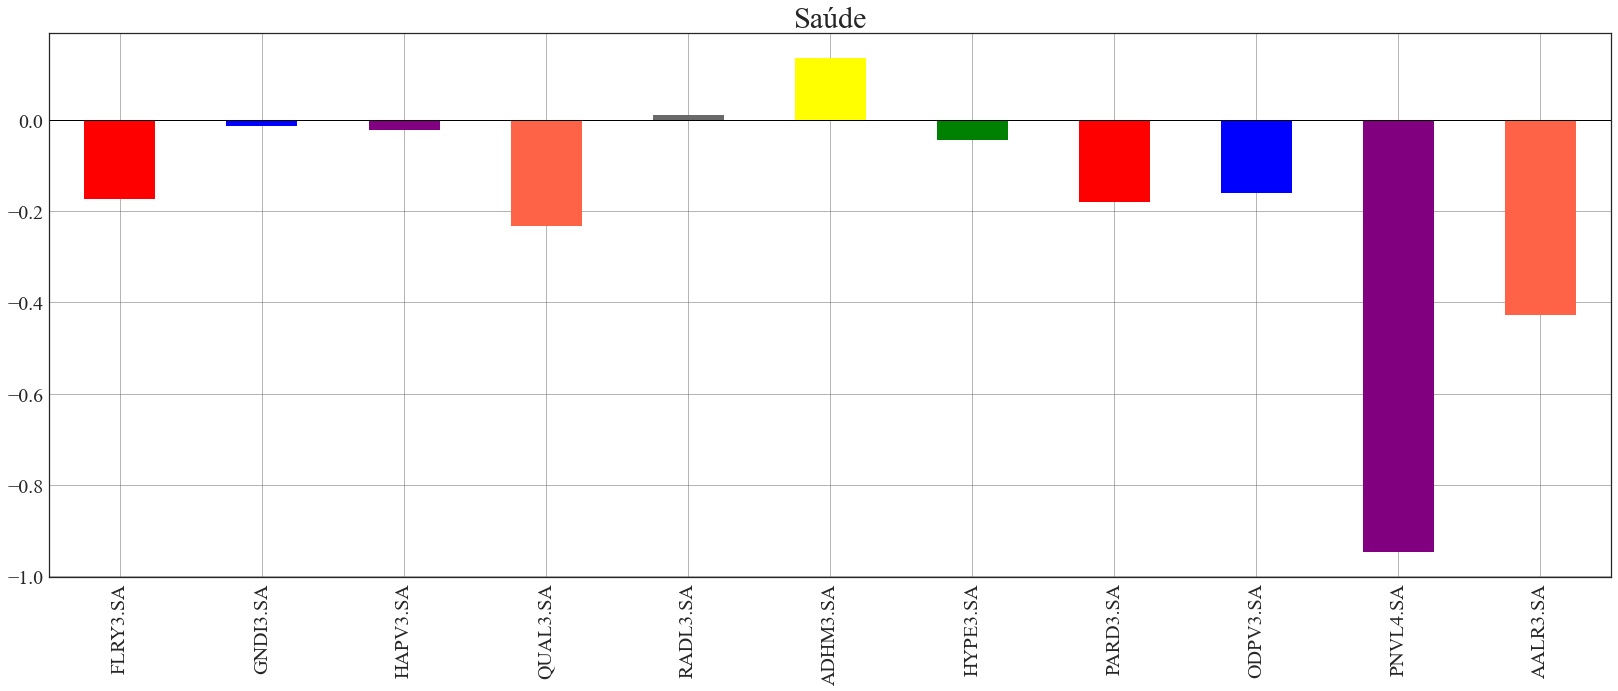

In [35]:
saude_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Saúde', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

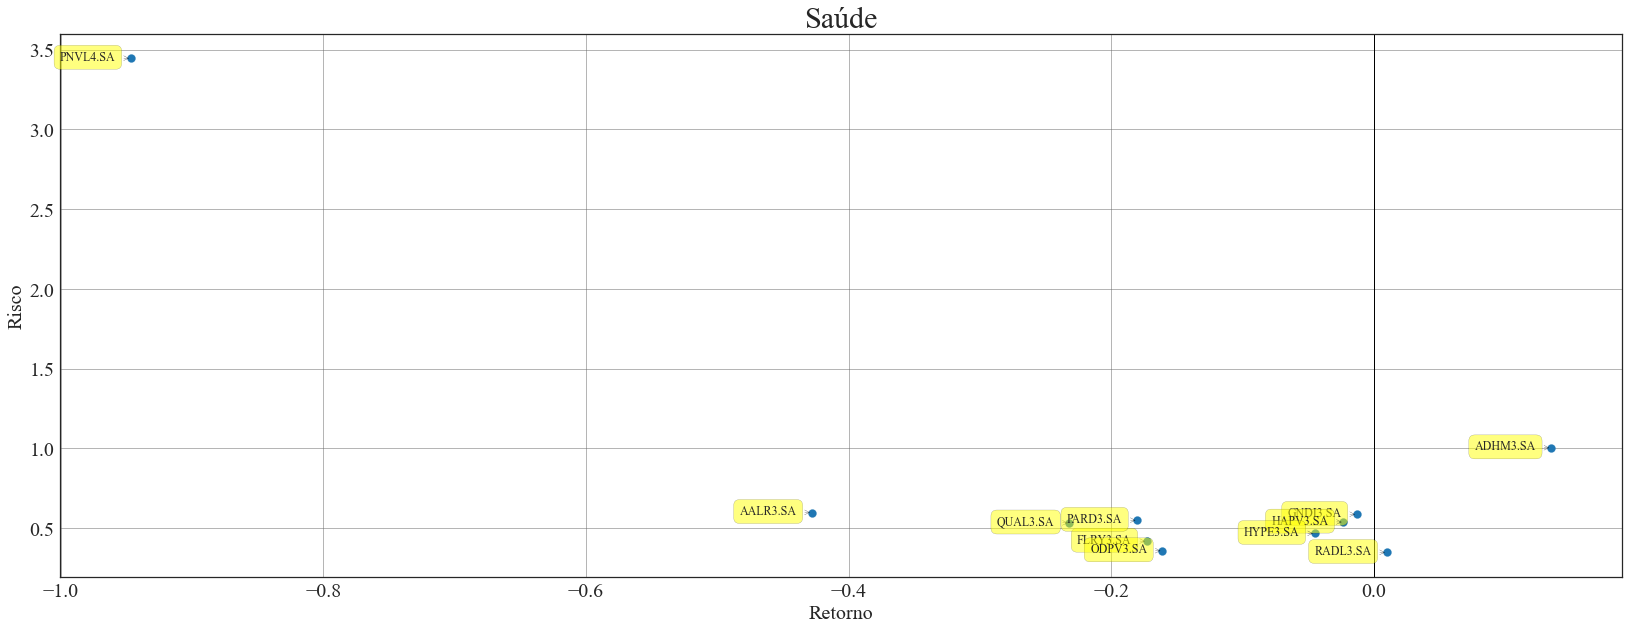

In [36]:
plt.subplots(figsize=(28,10))
plt.title('Saúde', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(saude_returns, saude_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(saude_returns.index, saude_returns, saude_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  12 of 12 completed


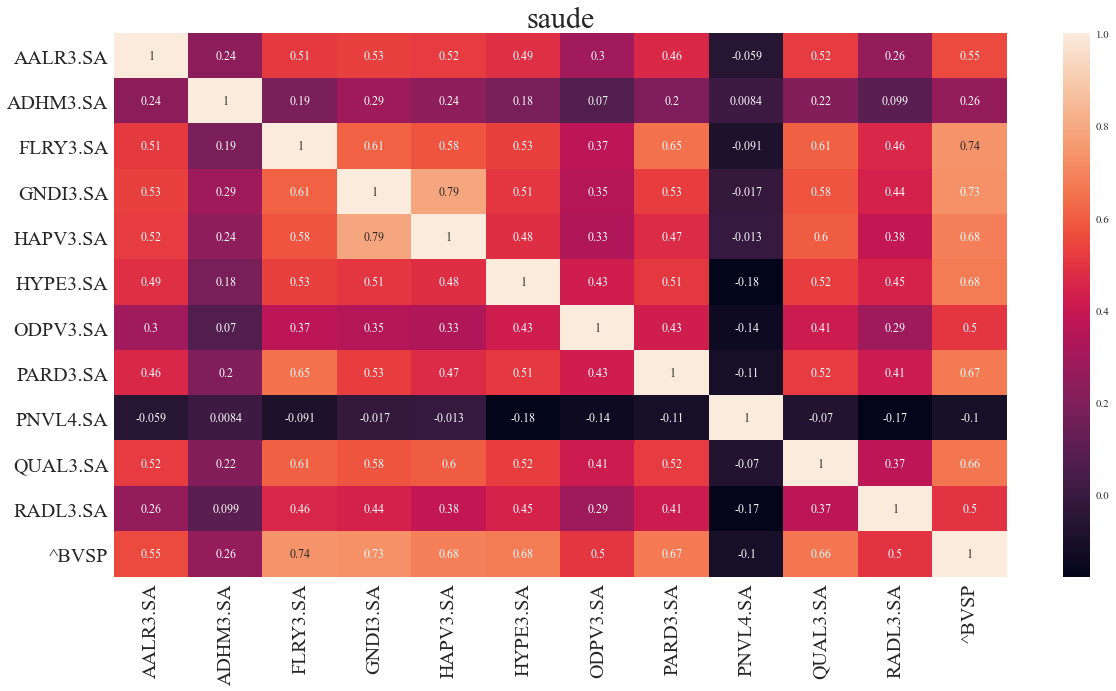

In [127]:
saude = saude+['^BVSP']
data    = yf.download(saude, start='2018-12-27', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
saude_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('saude', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(saude_daily_returns.corr(), annot=True)

# <u>***Alimentos***</u>

In [37]:
listOfReturns  = []
listOfRisks    = []
alimentos_returns = pd.Series(dtype='float64')
alimentos_risk    = pd.Series(dtype='float64')

for i in range(len(alimentos)):
    data    = yf.download(alimentos[i], start='2019-12-27', end='2020-07-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {alimentos[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {alimentos[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

alimentos_returns = alimentos_returns.append(listOfReturns)
alimentos_risk    = alimentos_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

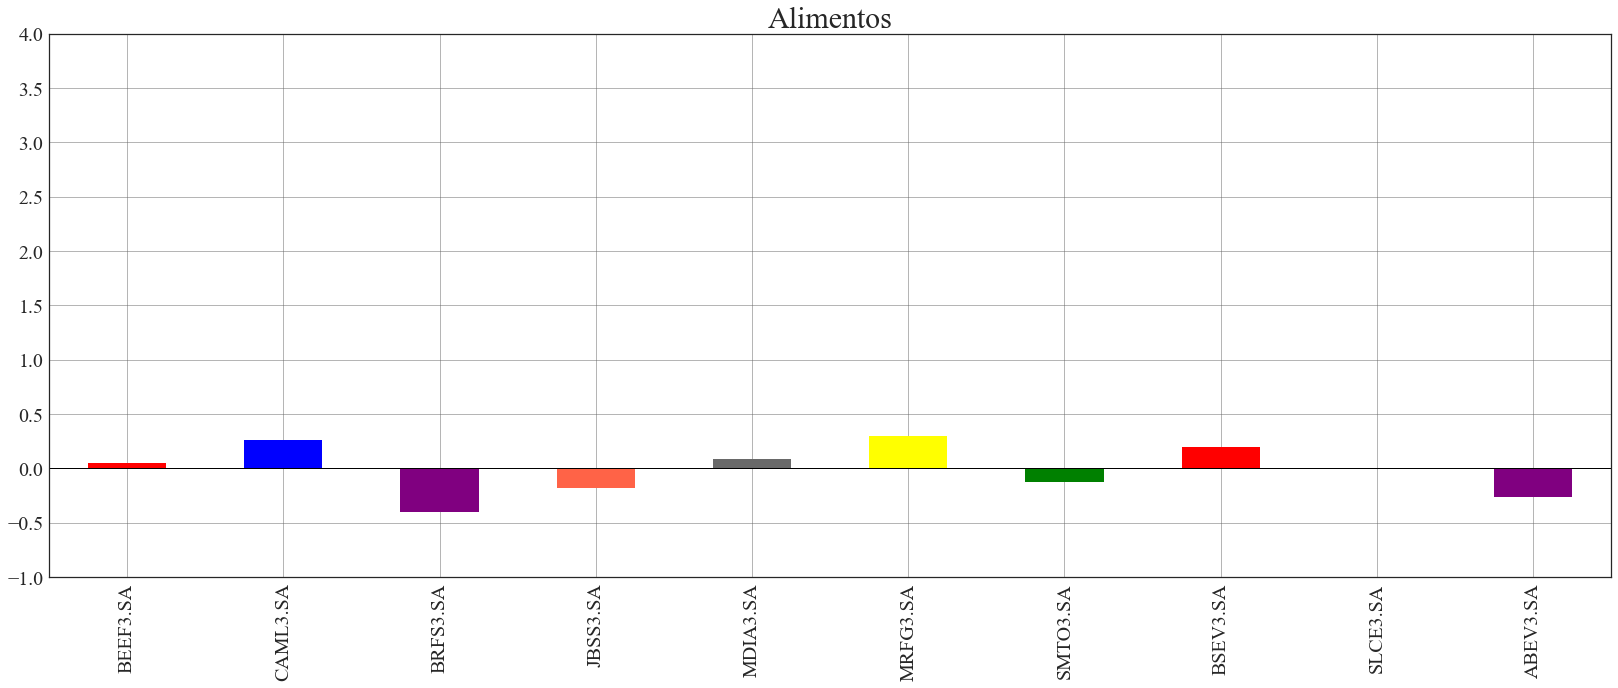

In [38]:
alimentos_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Alimentos', fontsize=30)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

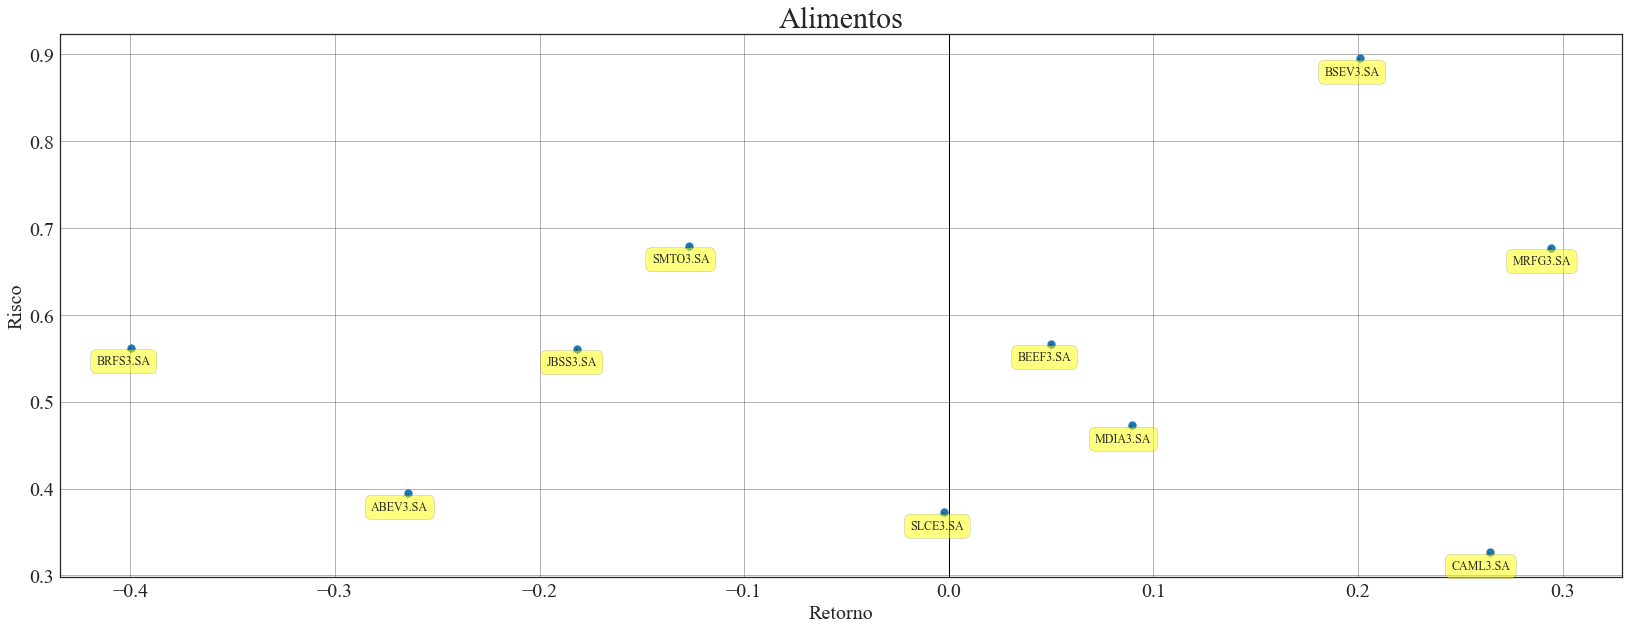

In [39]:
plt.subplots(figsize=(28,10))
plt.title('Alimentos', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(alimentos_returns, alimentos_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(alimentos_returns.index, alimentos_returns, alimentos_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Correlação

[*********************100%***********************]  11 of 11 completed


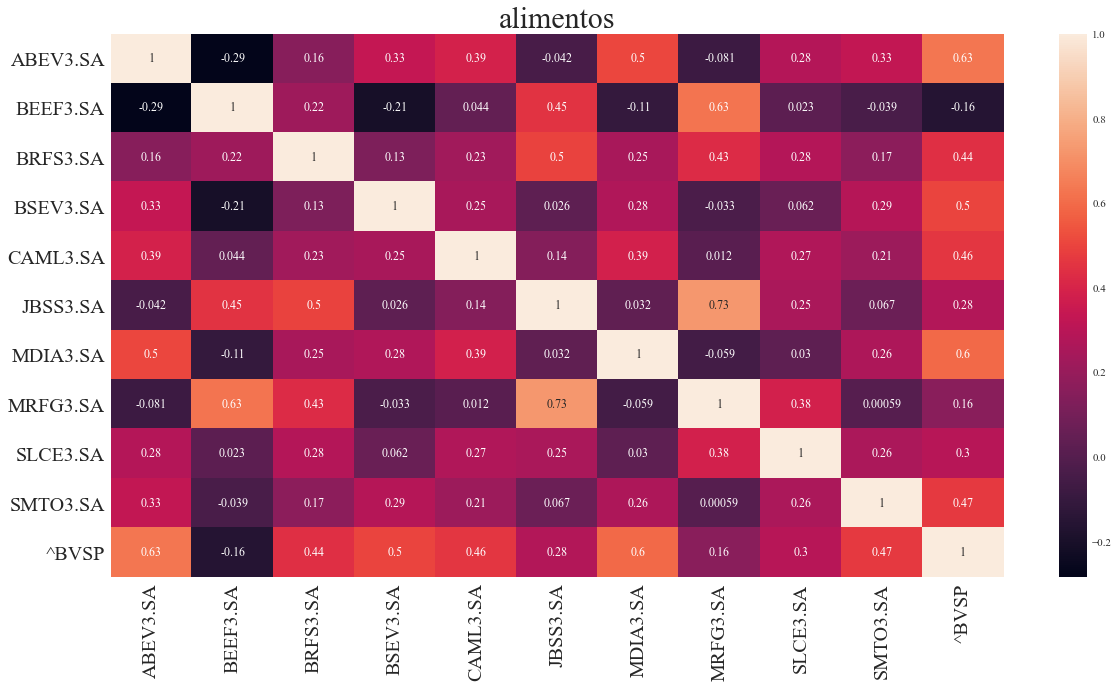

In [182]:
alimentos = alimentos+['^BVSP']
data    = yf.download(alimentos, start='2020-03-20', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
alimentos_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('alimentos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(alimentos_daily_returns.corr(), annot=True)

# <u>***Energia***</u>

In [43]:
listOfReturns  = []
listOfRisks    = []
energia_returns = pd.Series(dtype='float64')
energia_risk    = pd.Series(dtype='float64')

for i in range(len(energia)):
    data    = yf.download(energia[i], start='2018-12-27', end='2020-01-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {energia[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {energia[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

energia_returns = energia_returns.append(listOfReturns)
energia_risk    = energia_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retorno

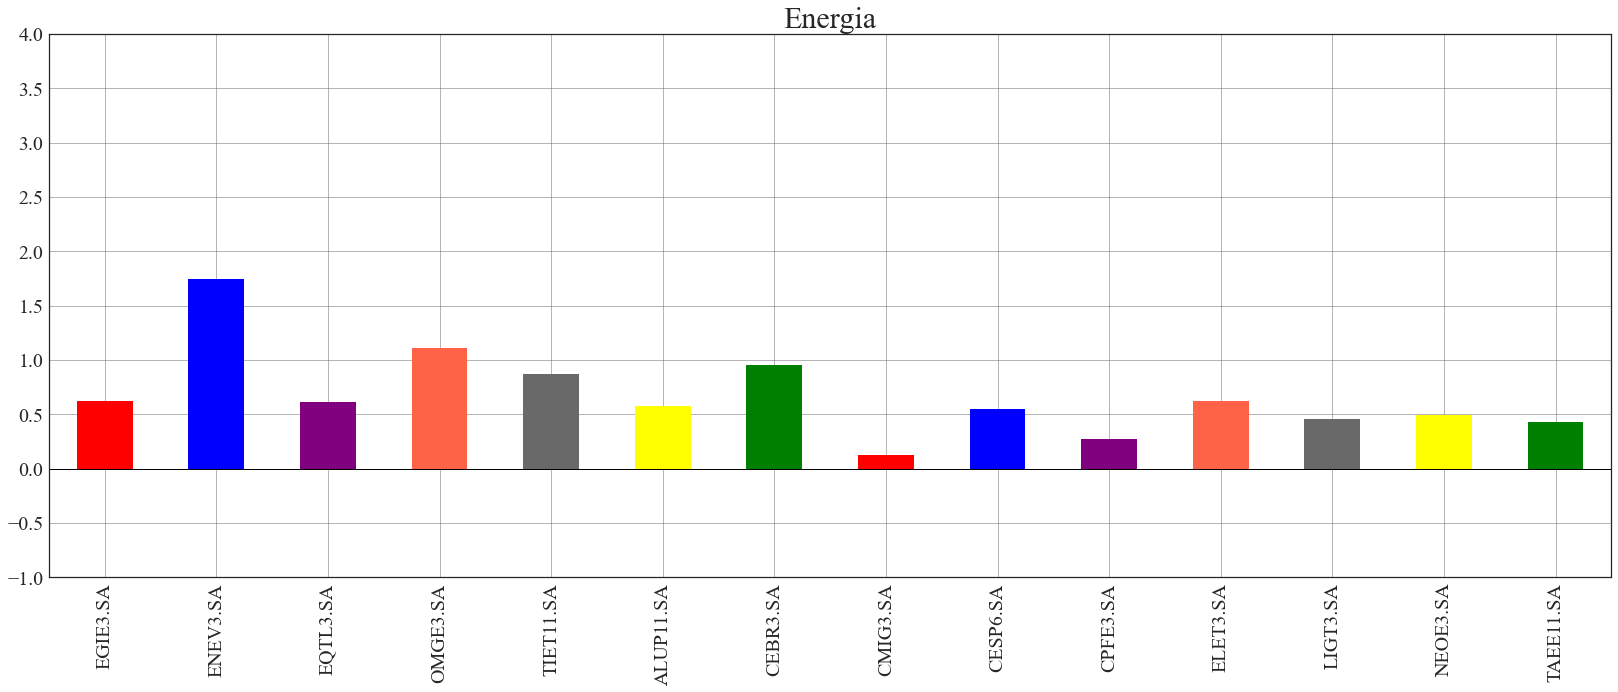

In [44]:
energia_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Energia', fontsize=30)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

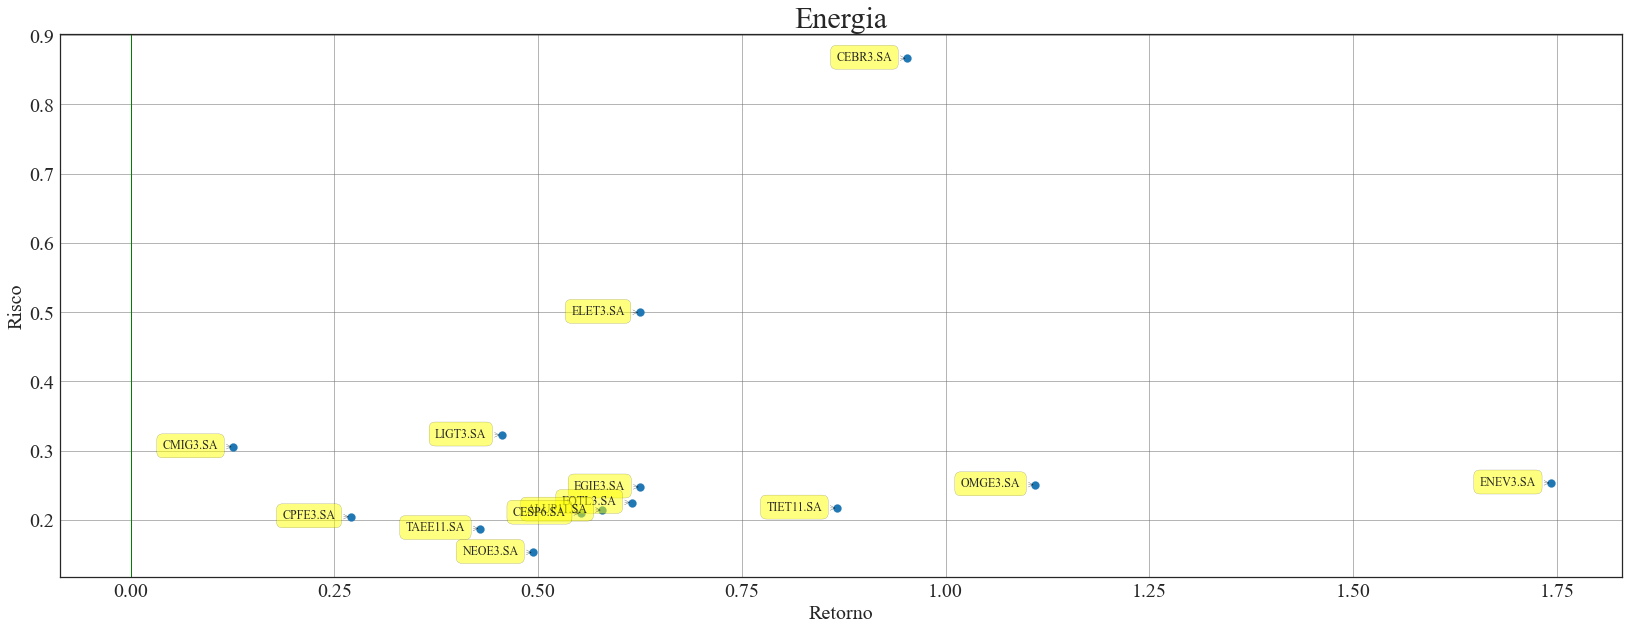

In [45]:
plt.subplots(figsize=(28,10))
plt.title('Energia', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(energia_returns, energia_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='green')

for label, x, y in zip(energia_returns.index, energia_returns, energia_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  15 of 15 completed


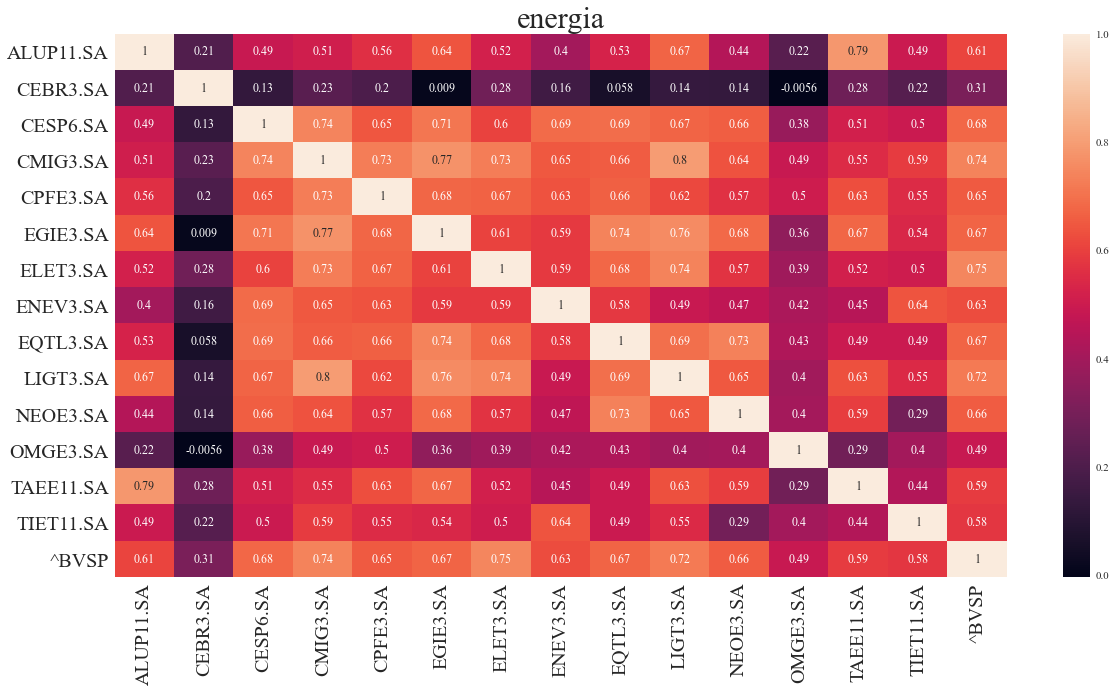

In [135]:
energia = energia+['^BVSP']
data    = yf.download(energia, start='2020-03-20', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
energia_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('energia', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(energia_daily_returns.corr(), annot=True)

# <u>***Tecnologia***</u>

In [186]:
listOfReturns  = []
listOfRisks    = []
tecnologia_returns = pd.Series(dtype='float64')
tecnologia_risk    = pd.Series(dtype='float64')

for i in range(len(tecnologia)):
    data    = yf.download(tecnologia[i], start='2017-01-01', end='2020-07-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {tecnologia[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {tecnologia[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

tecnologia_returns = tecnologia_returns.append(listOfReturns)
tecnologia_risk    = tecnologia_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

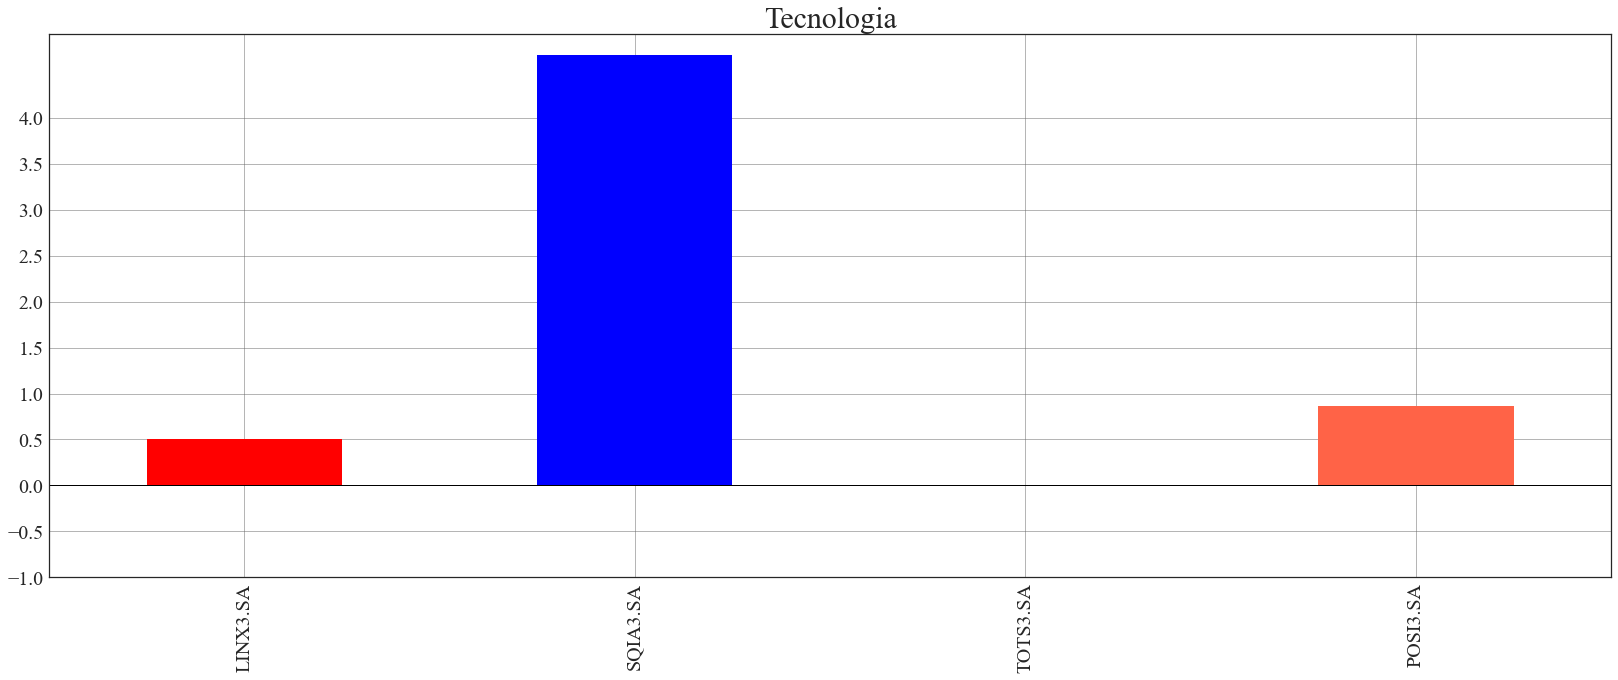

In [187]:
tecnologia_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Tecnologia', fontsize=30)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

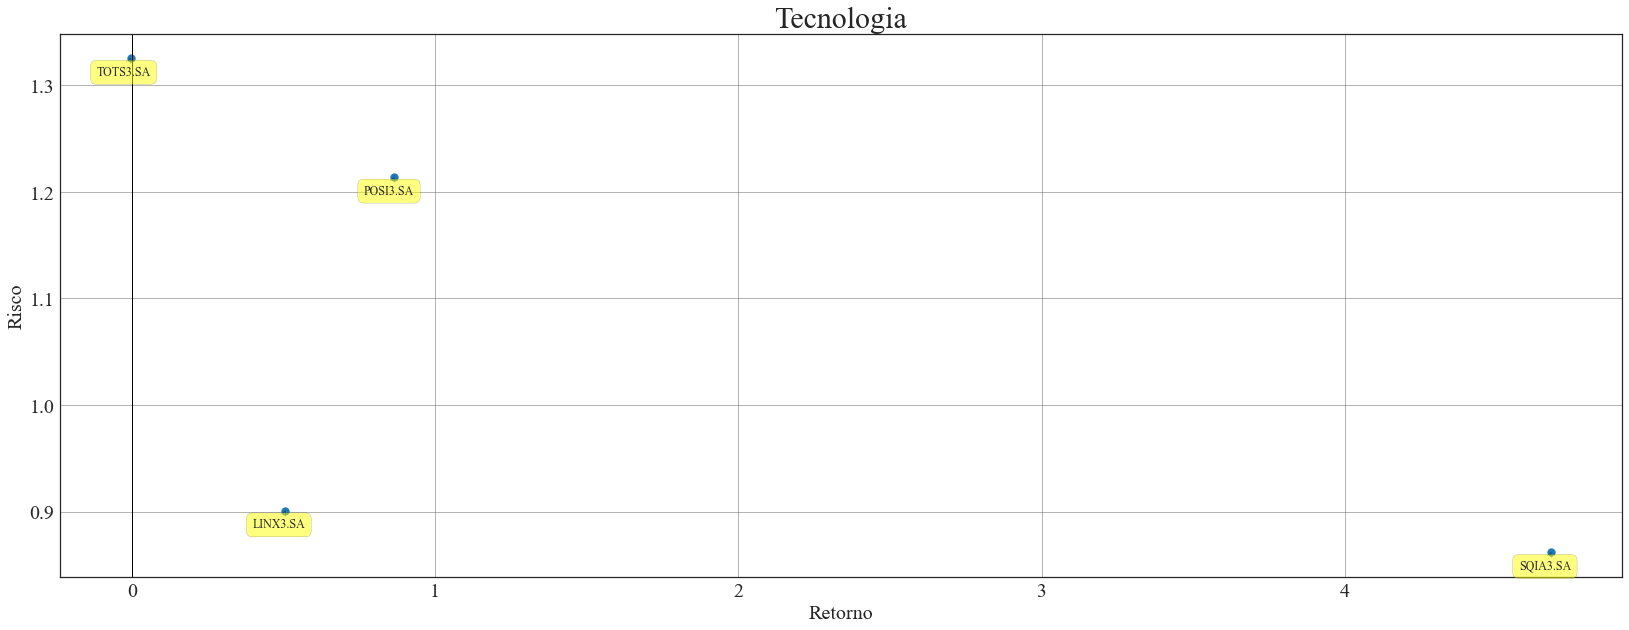

In [188]:
plt.subplots(figsize=(28,10))
plt.title('Tecnologia', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(tecnologia_returns, tecnologia_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(tecnologia_returns.index, tecnologia_returns, tecnologia_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  5 of 5 completed


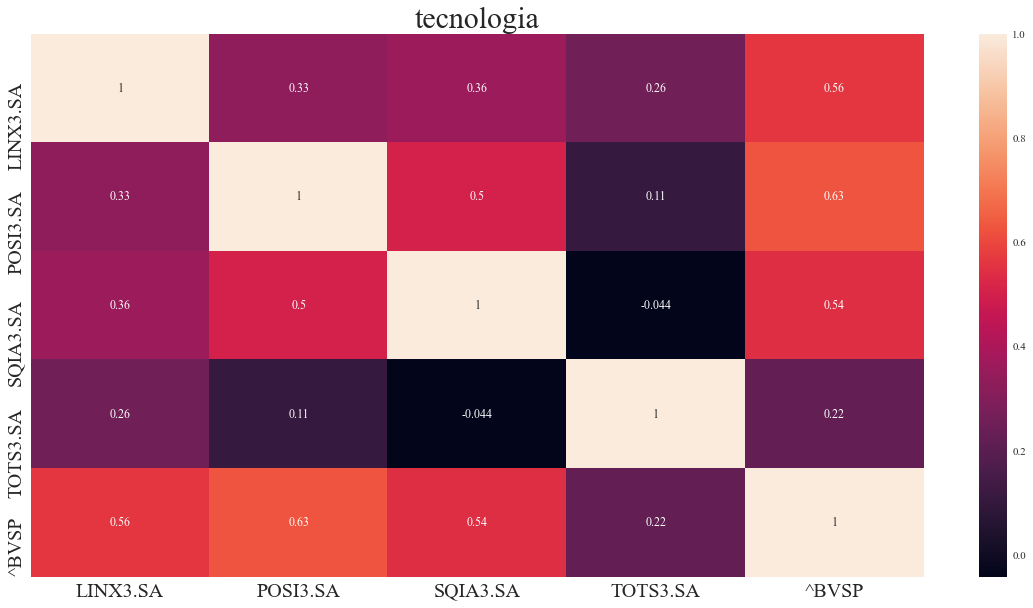

In [139]:
tecnologia = tecnologia+['^BVSP']
data    = yf.download(tecnologia, start='2020-03-20', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
tecnologia_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('tecnologia', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(tecnologia_daily_returns.corr(), annot=True)

# <u>***Materiais***</u>

In [46]:
listOfReturns  = []
listOfRisks    = []
materiais_returns = pd.Series(dtype='float64')
materiais_risk    = pd.Series(dtype='float64')

for i in range(len(materiais)):
    data    = yf.download(materiais[i], start='2019-12-27', end='2020-07-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {materiais[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {materiais[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

materiais_returns = materiais_returns.append(listOfReturns)
materiais_risk    = materiais_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Retorno

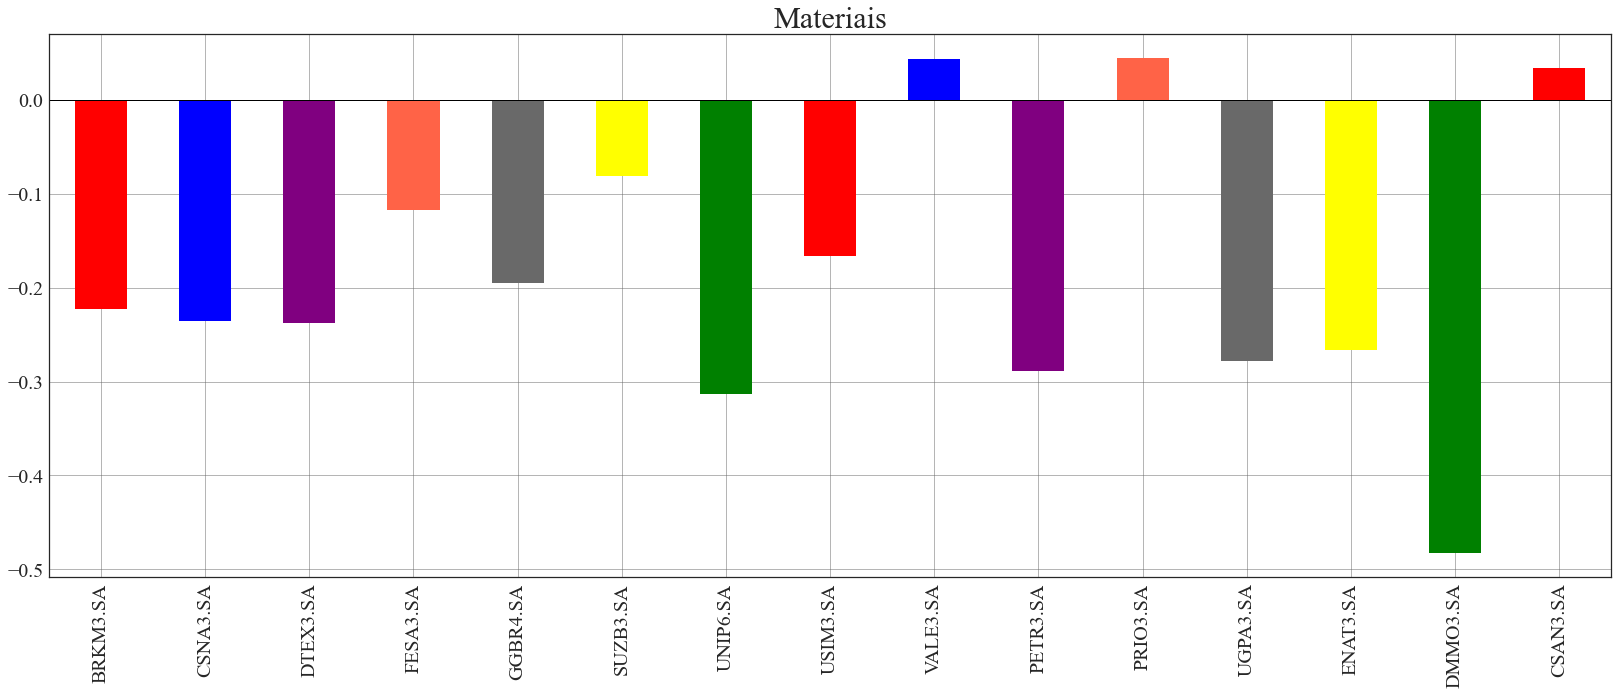

In [49]:
materiais_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Materiais', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno 

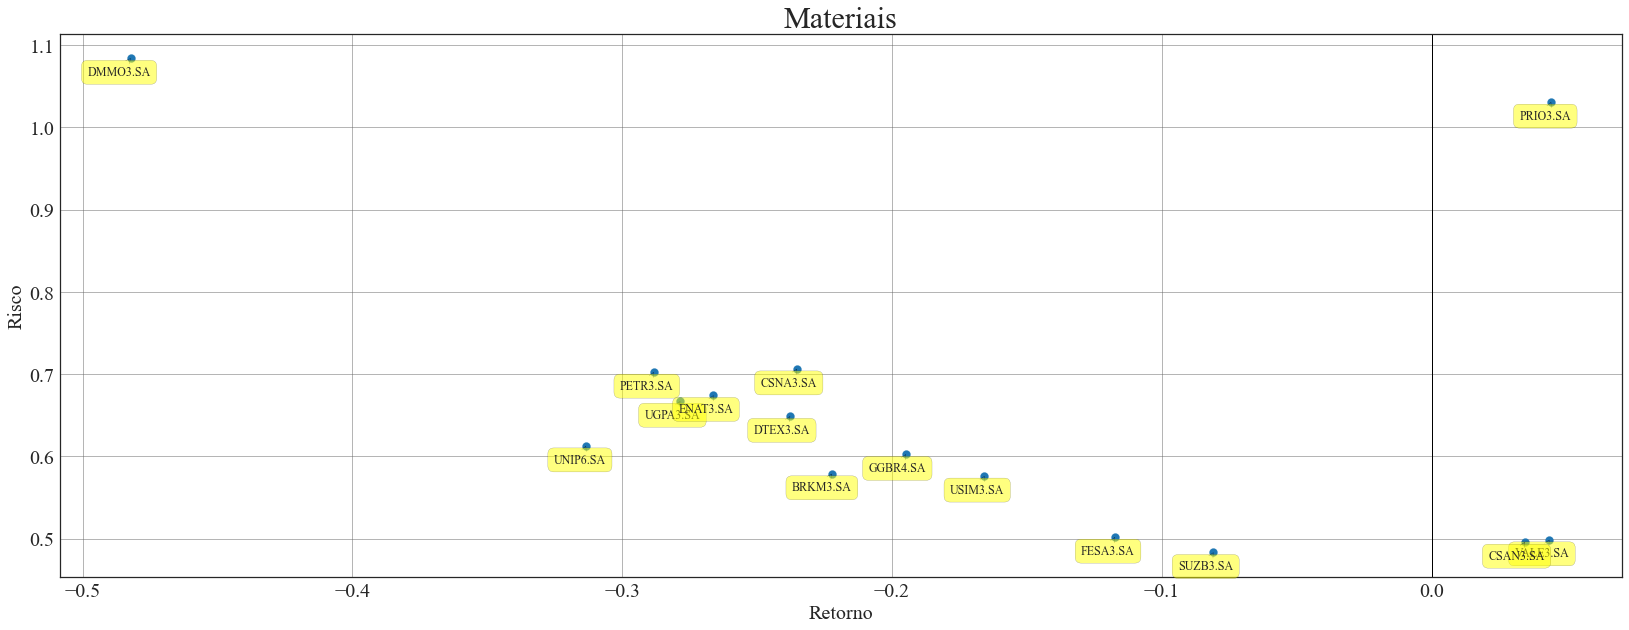

In [50]:
plt.subplots(figsize=(28,10))

plt.title('Materiais', fontsize=30)

plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)

plt.scatter(materiais_returns, materiais_risk)

plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(materiais_returns.index, materiais_returns, materiais_risk):
    
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  16 of 16 completed


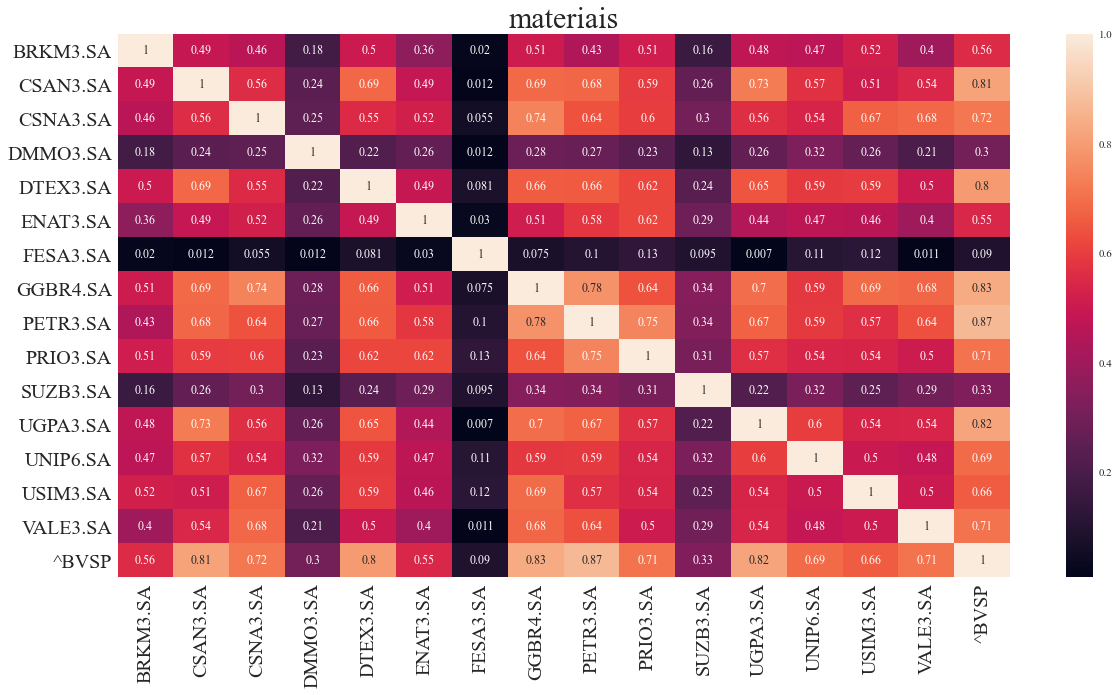

In [143]:
materiais = materiais+['^BVSP']
data    = yf.download(materiais, start='2018-12-27', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
materiais_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('materiais', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(materiais_daily_returns.corr(), annot=True)

# <u>***Carteira***</u>

In [205]:
listOfReturns  = []
listOfRisks    = []
diversos_returns = pd.Series(dtype='float64')
diversos_risk    = pd.Series(dtype='float64')

for i in range(len(diversos)):
    data    = yf.download(diversos[i], start='2019-01-01', end='2020-07-01')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {diversos[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {diversos[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

diversos_returns = diversos_returns.append(listOfReturns)
diversos_risk    = diversos_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retorno

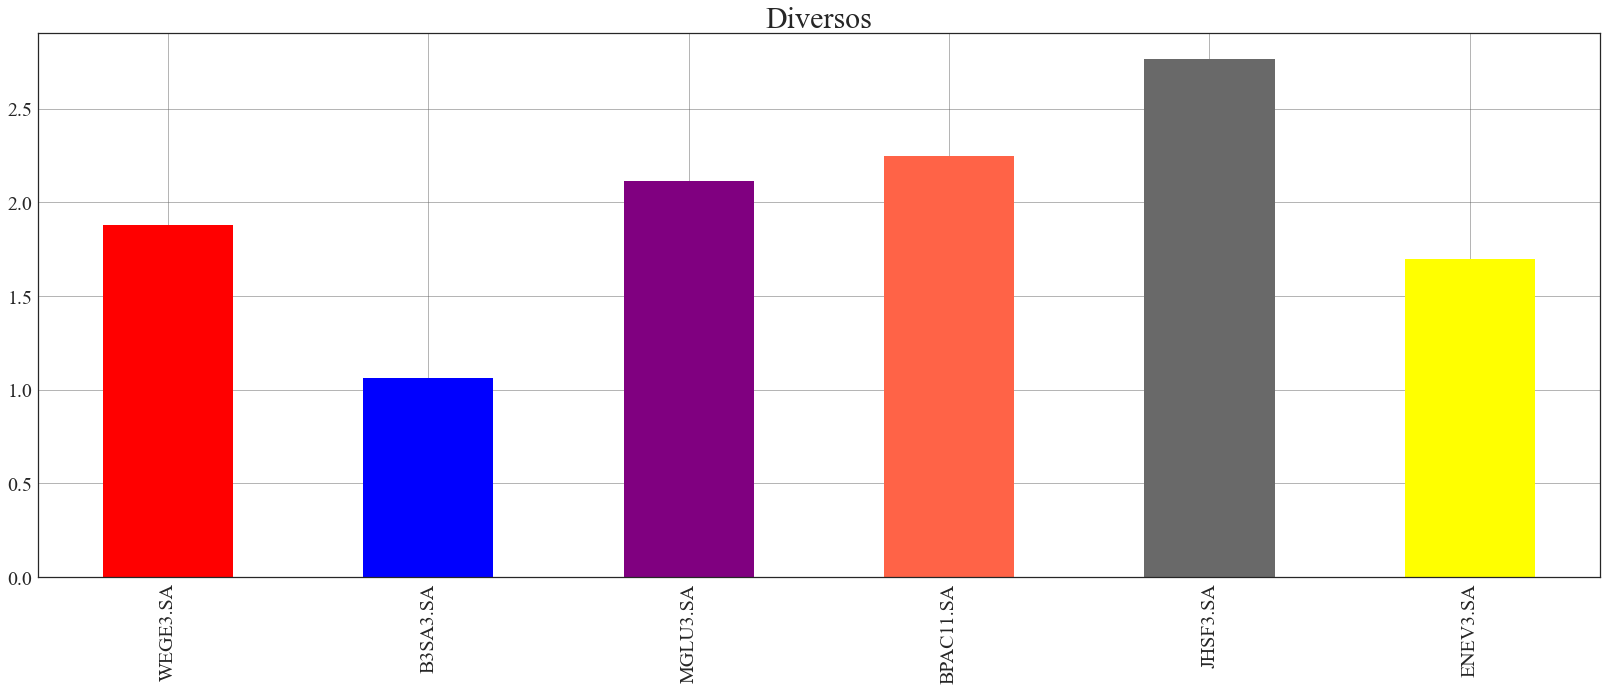

In [206]:
diversos_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Diversos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

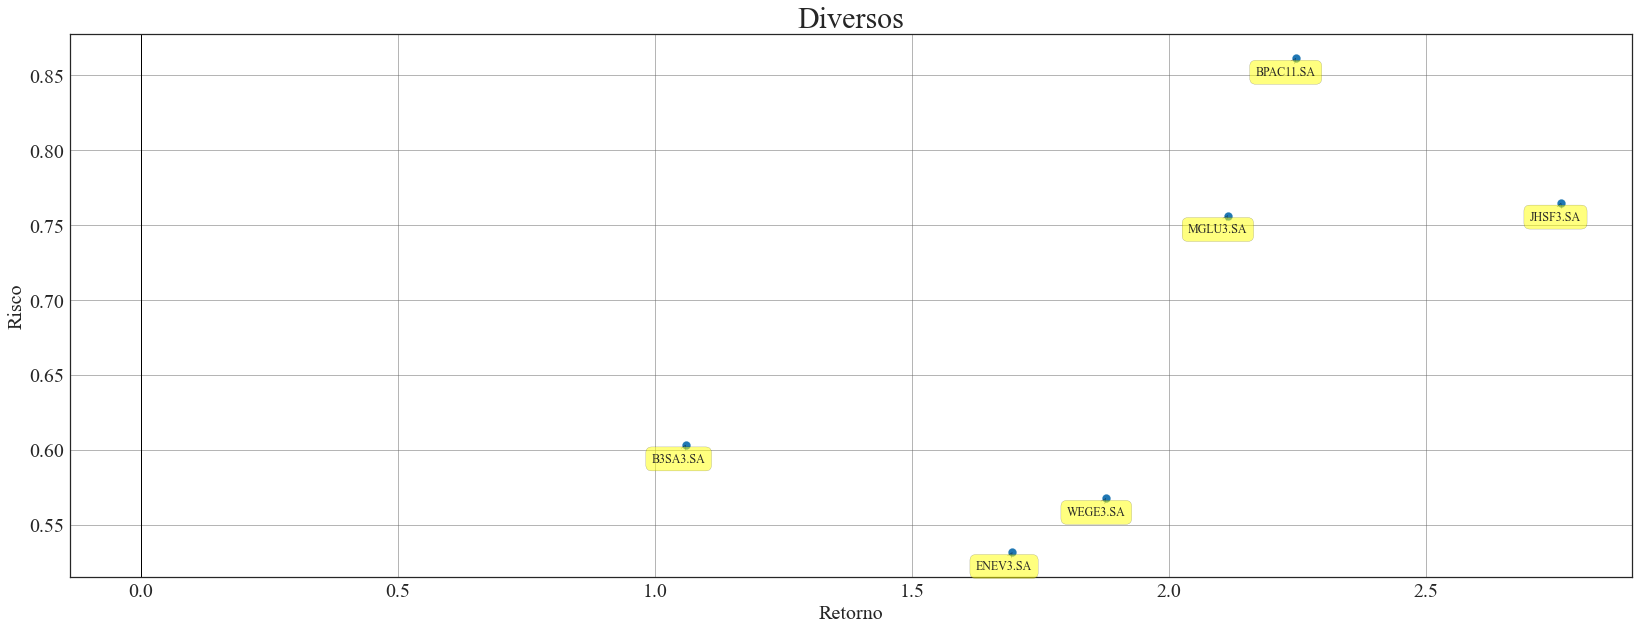

In [207]:
plt.subplots(figsize=(28,10))

plt.title('Diversos', fontsize=30)

plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)

plt.scatter(diversos_returns, diversos_risk)

plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(diversos_returns.index, diversos_returns, diversos_risk):
    
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  7 of 7 completed


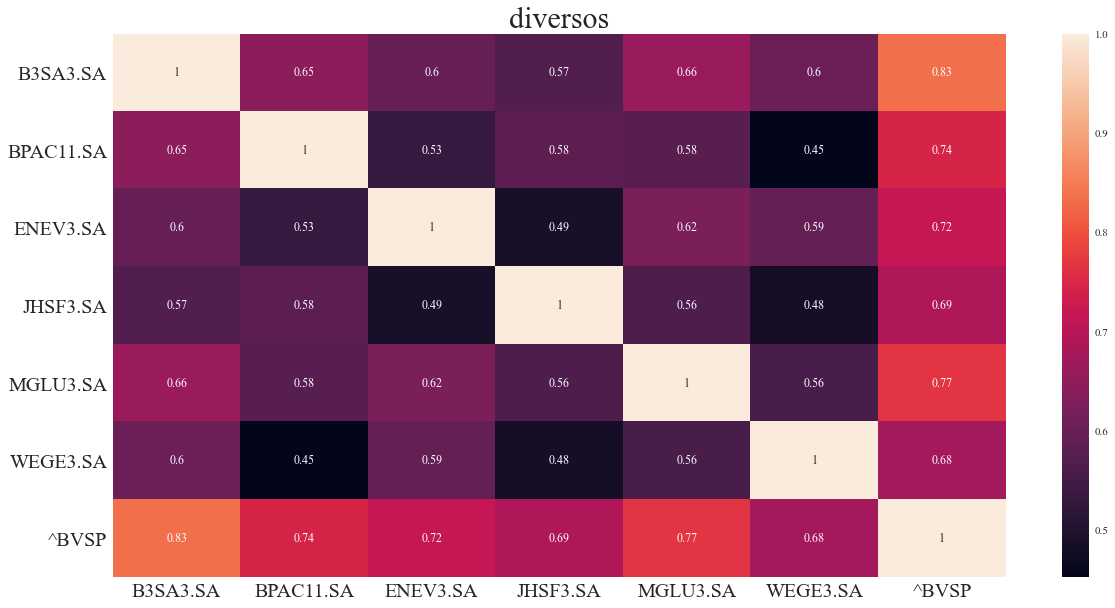

In [208]:
diversos = diversos+['^BVSP']
data    = yf.download(diversos, start='2019-01-01', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
diversos_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('diversos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(diversos_daily_returns.corr(), annot=True)

# Todos Ativos

In [3]:
tickers = ['B3SA3.SA', 'BPAC11.SA', 'MGLU3.SA']

In [4]:
listOfReturns  = []
listOfRisks    = []
listOfVaRs     = []
tickers_returns = pd.Series(dtype='float64')
tickers_risk    = pd.Series(dtype='float64')
tickers_VaR      = pd.Series(dtype='float64')

for i in range(len(tickers)):
    data    = yf.download(tickers[i], start='2019-01-01')['Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {tickers[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {tickers[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)
    
    var_95            = norm.ppf(1-0.95, np.mean(returns), np.std(returns))
    dictionary_var    = {tickers[i] : var_95}
    series_var        = pd.Series(dictionary_var)
    listOfVaRs.append(series_var)
    
tickers_returns = tickers_returns.append(listOfReturns)
tickers_risk    = tickers_risk.append(listOfRisks)
tickers_VaR     = tickers_VaR.append(listOfVaRs)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


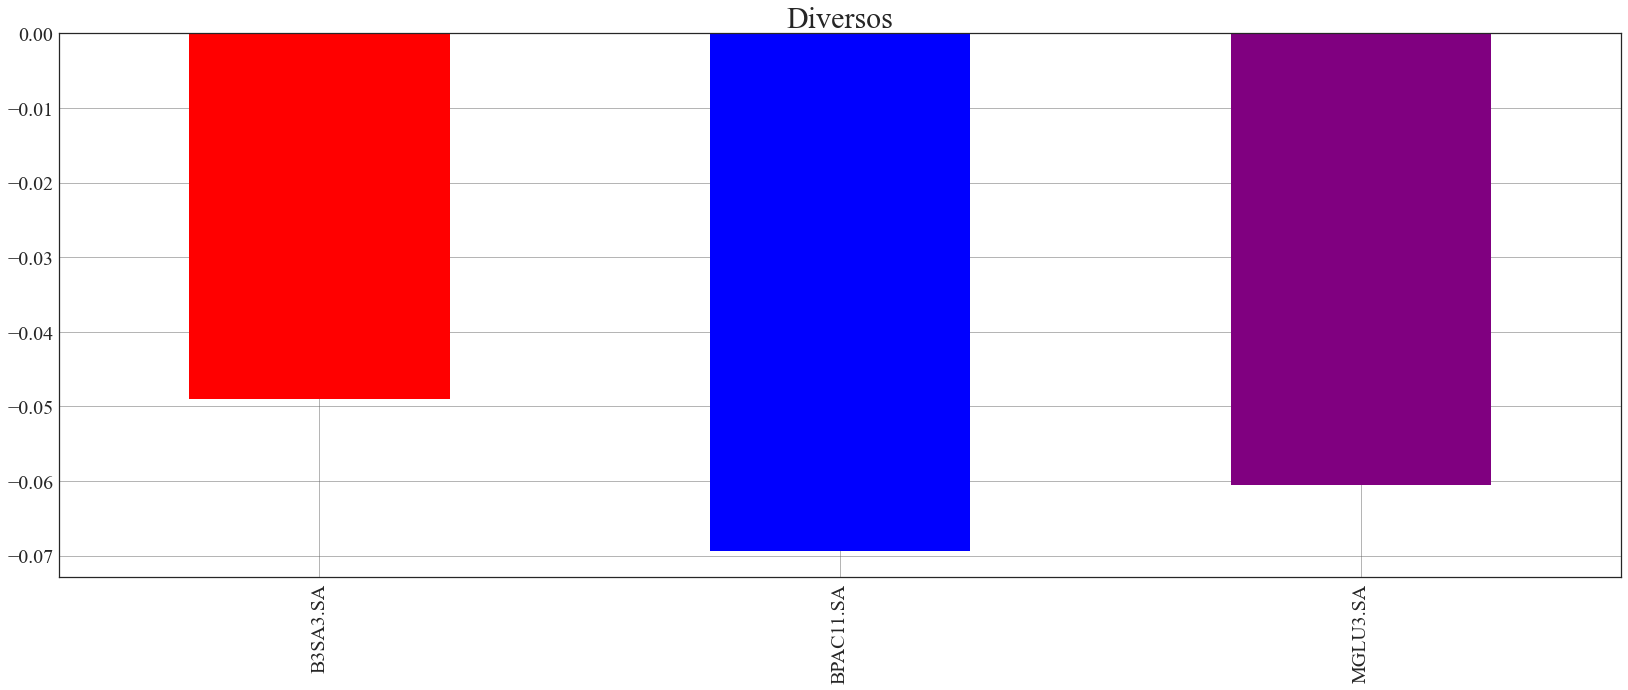

In [6]:
tickers_VaR.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Diversos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

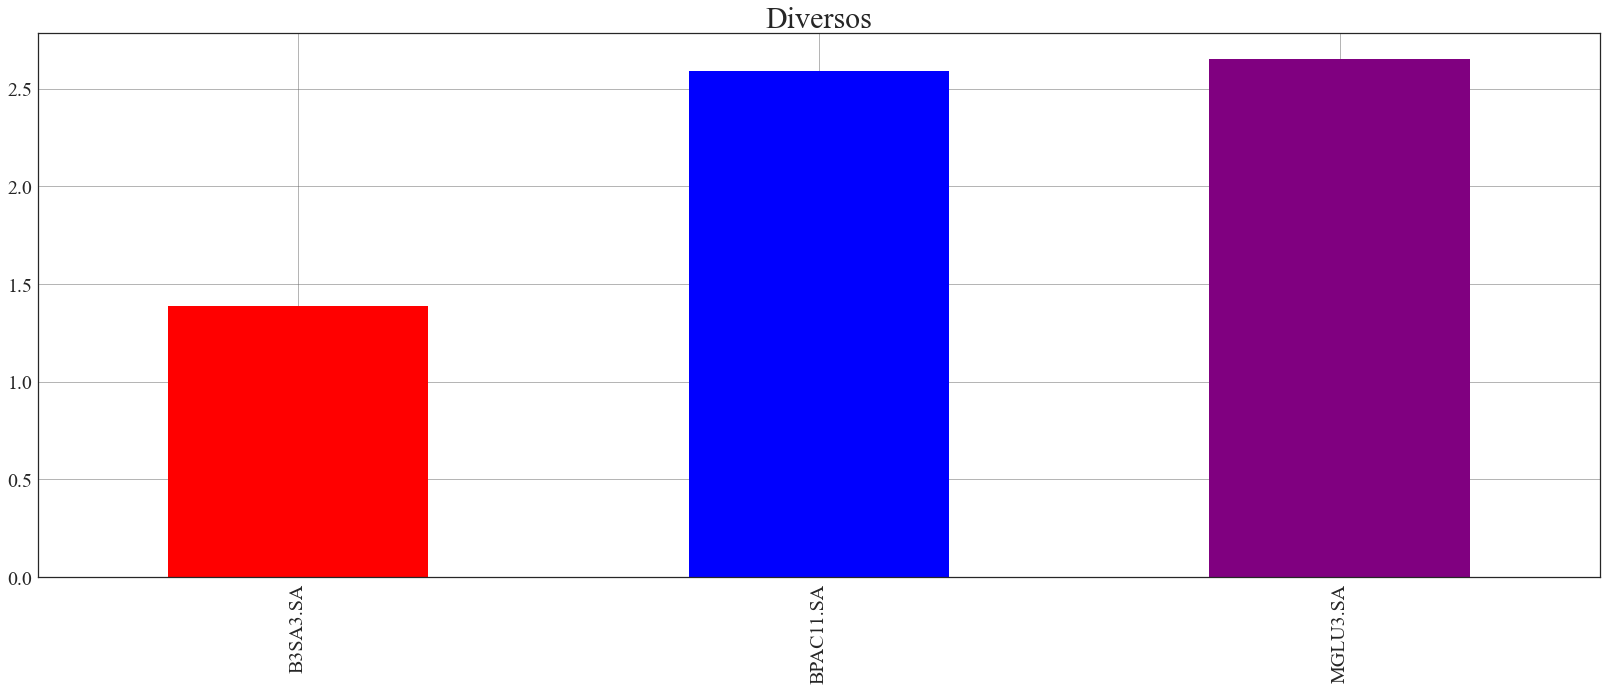

In [7]:
tickers_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Diversos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

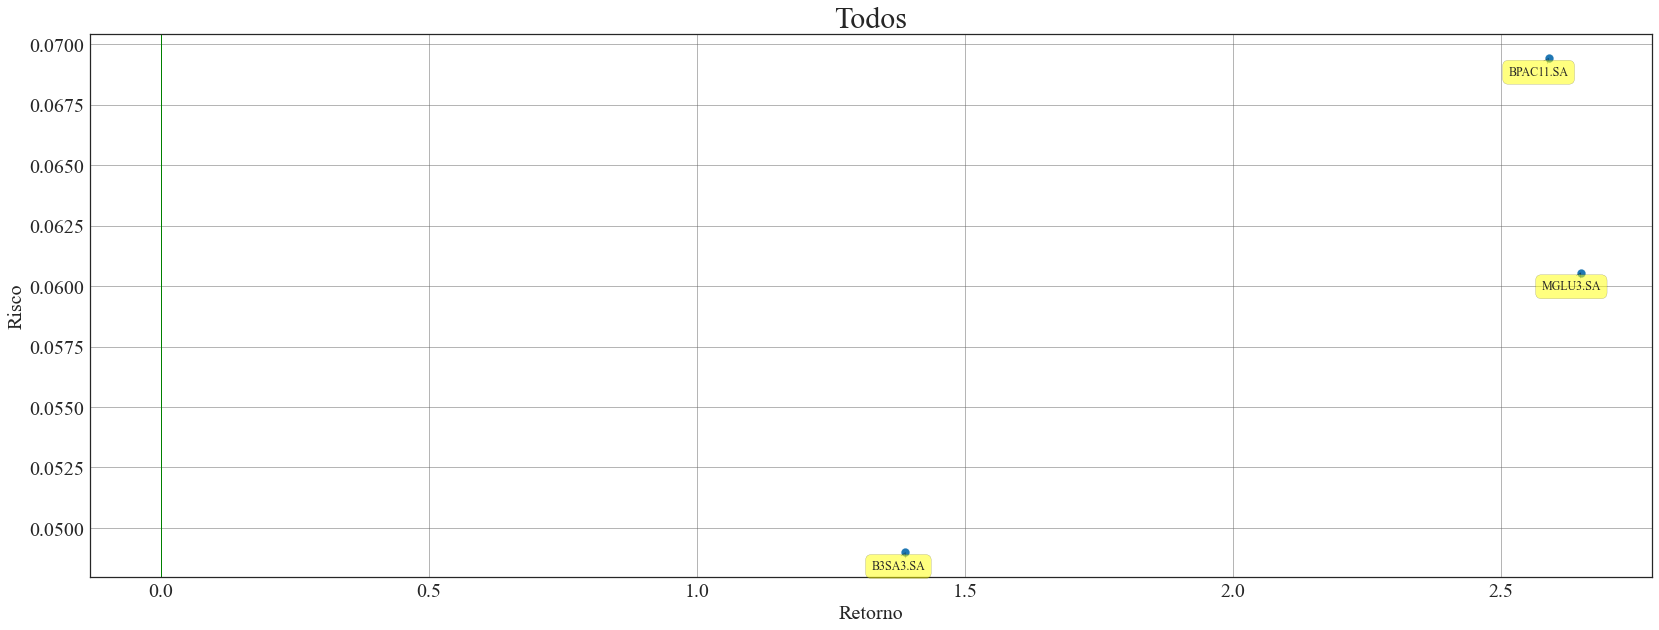

In [8]:
plt.subplots(figsize=(28,10))

plt.title('Todos', fontsize=30)

plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)

plt.scatter(tickers_returns, tickers_VaR*(-1))

plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='green')
#plt.margins(x=0, y=0.5)

for label, x, y in zip(tickers_returns.index, tickers_returns, tickers_VaR*(-1)):
    
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  4 of 4 completed


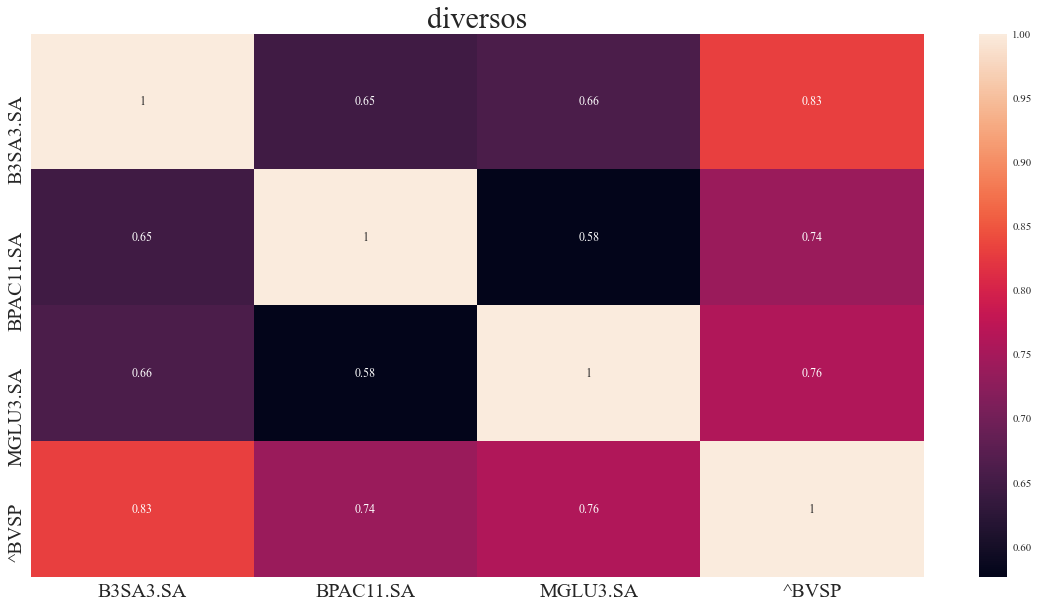

In [9]:
tickers = tickers+['^BVSP']
data    = yf.download(tickers, start='2019-01-01')['Adj Close']
data.ffill(inplace=True)
    
diversos_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('diversos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(diversos_daily_returns.corr(), annot=True)

# <u>***Risco x Retorno dos Setores***</u>

In [199]:
bvsp_data    = yf.download('^BVSP', start='2017-01-01', end='2020-07-01')['Adj Close']
data.ffill(inplace=True)
    
diversos_daily_returns = np.log(data).shift(-1) - np.log(data)

[*********************100%***********************]  1 of 1 completed


In [209]:
dict2     = {'Varejo'     : varejo_returns.mean(), 
            'Financeiro'  : financeiro_returns.mean(),
            'Construtoras': construtoras_returns.mean(),
            'Saude'       : saude_returns.mean(),
            'Alimentos'   : alimentos_returns.mean(),
            'Energia'     : energia_returns.mean(),
            'Tecnologia'  : tecnologia_returns.mean(),
            'Materiais'   : materiais_returns.mean(),
            'Diversos'    : diversos_returns.mean()}

dict1    = {'Varejo'      : varejo_risk.mean(), 
            'Financeiro'  : financeiro_risk.mean(),
            'Construtoras': construtoras_risk.mean(),
            'Saude'       : saude_risk.mean(),
            'Alimentos'   : alimentos_risk.mean(),
            'Energia'     : energia_risk.mean(),
            'Tecnologia'  : tecnologia_risk.mean(),
            'Materiais'   : materiais_risk.mean(),
            'Diversos'    : diversos_risk.mean()}

setores_return = pd.Series(dict2)
setores_risk   = pd.Series(dict1)

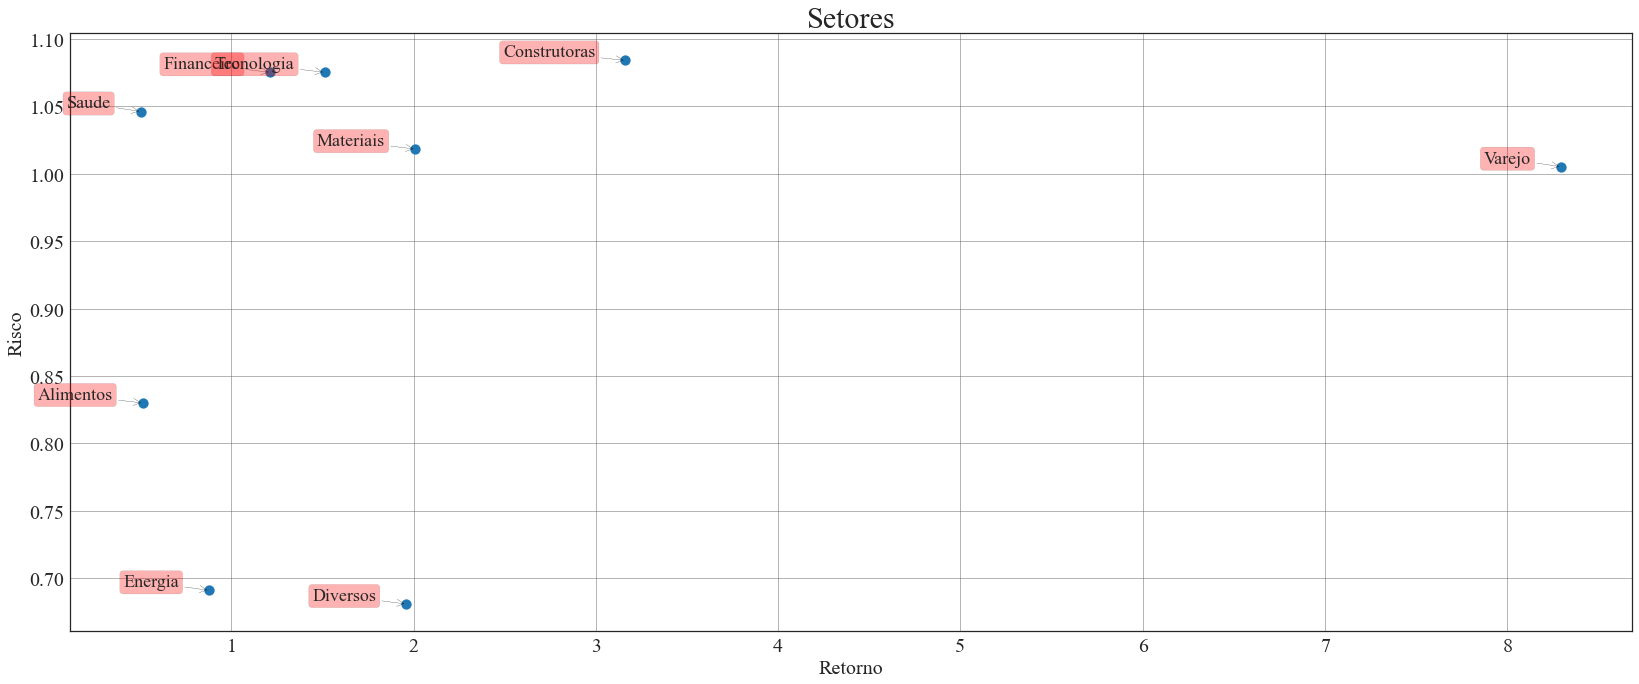

In [210]:
plt.subplots(figsize=(28,11))
plt.title('Setores', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(setores_return, setores_risk, s=100)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)

for label, x, y in zip(setores_return.index, setores_return, setores_risk):
    plt.annotate(label, fontsize=18, 
                 xy = (x, y), xytext = (-30, 0),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.2', fc = 'red', alpha = 0.3),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))